## Charting the Path to Sustainability: Integrating Land Sector Data with SDGs
### Land Sector Data Analysis by Country
#### Comprehensive Analysis of Geospatial Data
#### Case in Study - Burundi

#### TABLE OF CONTENT

#### 1. INTRODUCTION
    1.0 OVERVIEW
    1.1 AIM

#### 2. REPOSITORY
    2.0 IMPORT LIBRARIES
    2.1 LOAD DATASETS

#### 3. ADMINISTRATIVE
     3.0 BOUNDARY
       3.01 UNDERSTAND THE DATA
       3.02 COMPREHENSIVE ANALYSIS
     3.1 PROTECTED AREAS
       3.11 UNDERSTAND THE DATA
       3.12 COMPREHENSIVE ANALYSIS
     3.2 ROADS
       3.21 UNDERSTAND THE DATA
       3.22 COMPREHENSIVE ANALYSIS
     3.3 ADMINISTRATIVE OVERVIEW

#### 4. BIOCLIMATIC AND ECOLOGICAL ZONES
     4.0 BIODIVERSITY HOTSPOTS
       4.01 UNDERSTAND THE DATA
       4.02 COMPREHENSIVE ANALYSIS
     4.1 ECOLOGICAL ZONES
       4.11 UNDERSTAND THE DATA
       4.12 COMPREHENSIVE ANALYSIS
     4.2 AGROECOLOGICAL ZONES
       4.21 UNDERSTAND THE DATA
       4.22 COMPREHENSIVE ANALYSIS
     4.3 HOLDRIDGE LIFE ZONES
       4.31 UNDERSTAND THE DATA
       4.32 COMPREHENSIVE DATA
     4.4 TERRESTIAL ECOREGIONS
       4.41 UNDERSTAND THE DATA
       4.42 COMPREHENSIVE ANALYSIS
     4.5 BIOCLIMATIC AND ECOLOGICAL ZONES OVERVIEW

#### 5.SOIL RESOURCES
    5.0 SOIL RESOURCES
      5.01 UNDERSTAND THE DATA
      5.02 COMPREHENSIVE ANALYSIS
    5.1 SOIL RESOURCES OVERVIEW

#### 6. CLIMATE
     6.0 CLIMATE ZONES
       6.01 UNDERSTAND THE DATA
       6.02 COMPREHENSIVE ANALYSIS
     6.1 CLIMATE SHIFTS
       6.11 UNDERSTAND THE DATA
       6.12 COMPREHENSIVE ANALYSIS
     6.2 CLIMATE ZONES OVERVIEW

#### 7. SUMMARY & RECOMMENDATION

#### 8. REFERENCES

#### 1. INTRODUCTION
    1.0 OVERVIEW

Burundi, formally known as the Republic of Burundi, lies nestled within the Great Rift Valley, bridging the African Great Lakes region with East Africa. It shares borders with Rwanda to the north, Tanzania to the east and southeast, and the Democratic Republic of the Congo to the west. The capital cities are Gitega and Bujumbura, with the latter serving as the country's largest urban center.

Despite its small size, Burundi's landscape is predominantly utilized for subsistence agriculture and pastoral activities. However, the nation grapples with significant ecological challenges, including deforestation, soil erosion, and habitat degradation. By 2005, deforestation had reached alarming levels, with nearly all of the country's forests depleted. A mere fraction, less than 6% of Burundi's land, remained forested, with more than half of that area designated for commercial plantations.

This project involves carrying out geospatial analysis to explore and understand the geographic context of the land sector data for Burundi (BDI). The project's processes include;
- Data Preparation
- Exploratory Data Analysis
- Geospatial Analysis
- Data Interpretation

Data cleaning is unnecessary as the datasets are preprocessed and FLINT-ready.

    1.1 AIM

The aim of the this project is to apply various analytical techniques to gain insights into the spatial patterns, relationships, and characteristics of the land sector data. 

#### 2. REPOSITORY
    2.0 IMPORT LIBRARIES

Importing libraries is a critical step before loading the dataset. It is critical to import only the libraries that you are certain you will need to work with your dataset. To import to libraries, use the keyword import.

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import geoplot as gplt 
import geoplot.crs as gcrs 
import folium
import os

    3.01 LOAD DATASETS

In [125]:
def download_and_read_shapefile(file_id, filename):
    # Check if the file exists
    if not os.path.exists(filename):
        # Download the file
        url = "https://drive.google.com/uc?id=" + file_id
        gdown.download(url, output=filename, quiet=False)
    
    # Read the shapefile into a GeoDataFrame
    return gpd.read_file(filename)

# Define file IDs and corresponding filenames
file_data = {
    "admin": {
        "file_id": "1QeiKAwIMLXxnOwr2uAUhqGejm6LGvzfm",
        "filename": "BDI_AL2_Burundi.json"
    },
    "adminstates": {
        "file_id": "1fJ3gqEnGZs7r1BG7DmB9G8It9b4Qd6rr",
        "filename": "BDI_ALL_states.json"
    },
    "gez": {
        "file_id": "1ACA6OGV_aW4BWpiSknHytDmPCNk_75lK",
        "filename": "BDI_AL2_Burundi_GEZ.json"
    },
    "gezstates": {
        "file_id": "1mdrrCo6yHaI7qv6yloU_KLfzDWdlu3NG",
        "filename": "BDI_ALL_states_GEZ.json"
    },
    "soil": {
        "file_id": "1XnJ8nvtIV9AnydwmOEX8cuBfessEpyqB", 
        "filename": "BDI_AL2_Burundi_WSR.json"
    },
    "biodiv_hotspots": {
        "file_id": "1_mfGM-9gE6p10vPwePnjRNBgp8ysA0dy",
        "filename":"CI_BiodiversityHotspots.geojson"
    },
     "hldridge": {
        "file_id": "1nnHitsfCPrfxuxj8Saxdc5lueEpeQ52T",
        "filename": "HoldridgeLifeZones.json"
    },
     "terr_ecoregion": {
        "file_id": "1tkrT7UCaaMmEyr-xVGxTDPhFBSvGw_6M",
        "filename": "TerrestrialEcoregionsoftheWorld_WWF.geojson"
    },
     "aeczones": {
        "file_id": "1R4vMJTE1rTA5oSTiAQHp1hemvYrflMeq",
        "filename": "GlobalAgroEcologicalZones_GAEZ.geojson"
    },
     "open_globalroads": {
        "file_id": "1YLo59yilv2m540eNe7Mt6Iv93dRA7l1C",
        "filename": "Global Roads Open Access Data Set_dissolved.json"
    },
   "wrld_climzones": {
        "file_id": "1NJRMUyZ2QCTSu9dXz9inzlgHDt_QGUqg",
        "filename": "IPCC_ClimateZoneMap_Vector.geojson"
    } 
}

# Define GeoDataFrames
geo_data = {}

# Download and read shapefiles
for var_name, data in file_data.items():
    geo_data[var_name] = download_and_read_shapefile(data["file_id"], data["filename"])

#### 3. ADMINISTRATIVE

    3.0 BOUNDARY

In [3]:
# Read the shapefile into geodataframe
admin = geo_data["admin"]

In [4]:
# Check the first 2 rows of the dataframe
admin.head(2)

country ISO3166_2     name   enname  locname                offname  \
0     BDI            Burundi  Burundi  Burundi  Republika y'u Burundi   

         boundary  adminlevel wikidata    wikimedia           timestamp  \
0  administrative           2     Q967  rn:Uburundi 2019-10-09 22:03:02   

                                            geometry  
0  MULTIPOLYGON (((29.00074 -2.79035, 29.00092 -2...

In [5]:
# Access geodataframe
adminstates = geo_data["adminstates"]

In [6]:
# Check the first 2 rows of the dataframe
adminstates.head(2)

country ISO3166_2              name enname           locname offname  \
0     BDI     BI-BB           Bubanza                  Bubanza           
1     BDI     BI-BM  Bujumbura Mairie         Bujumbura Mairie           

         boundary  adminlevel  wikidata wikimedia           timestamp  \
0  administrative           4   Q460538           2019-10-10 22:47:02   
1  administrative           4  Q1816580           2019-07-13 22:01:02   

                                            geometry  
0  POLYGON ((29.22263 -3.19776, 29.22263 -3.19874...  
1  POLYGON ((29.28880 -3.34510, 29.28881 -3.34549...

        COUNTRY BOUNDARY

In [7]:
# Check no.of rows and columns for admin boundary dataframme
admin.shape

(1, 12)

The administrative boundary dataframe has 1 row and 12 columns.

In [8]:
# View all column titles in the dataframe
admin.columns

Index(['country', 'ISO3166_2', 'name', 'enname', 'locname', 'offname',
       'boundary', 'adminlevel', 'wikidata', 'wikimedia', 'timestamp',
       'geometry'],
      dtype='object')

The above shows the names of the columns.

In [9]:
# Check the data-type of each column
admin.dtypes

country               object
ISO3166_2             object
name                  object
enname                object
locname               object
offname               object
boundary              object
adminlevel             int64
wikidata              object
wikimedia             object
timestamp     datetime64[ns]
geometry            geometry
dtype: object

The above shows the data types for each column.

In [10]:
# Check information about the dataframe
admin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     1 non-null      object        
 1   ISO3166_2   1 non-null      object        
 2   name        1 non-null      object        
 3   enname      1 non-null      object        
 4   locname     1 non-null      object        
 5   offname     1 non-null      object        
 6   boundary    1 non-null      object        
 7   adminlevel  1 non-null      int64         
 8   wikidata    1 non-null      object        
 9   wikimedia   1 non-null      object        
 10  timestamp   1 non-null      datetime64[ns]
 11  geometry    1 non-null      geometry      
dtypes: datetime64[ns](1), geometry(1), int64(1), object(9)
memory usage: 228.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [11]:
# Check the coordinate system of the dataframe
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate system of the dataframe is 4326, which is the WGS 84 coordinate system.

In [12]:
# Check the geometric type of the dataframe
admin.geom_type

0    MultiPolygon
dtype: object

       STATE BOUNDARIES

In [13]:
# Check no.of rows and columns for states boundaries dataframme
adminstates.shape

(18, 12)

The states boundaries dataframe has 18 rows and 12 columns.

Note:  Further details regarding the boundaries of individual states within Burundi are not required for the current scope of analysis.

    3.02 COMPREHENSIVE ANALYSIS

    DEFINE THE BOUNDARY

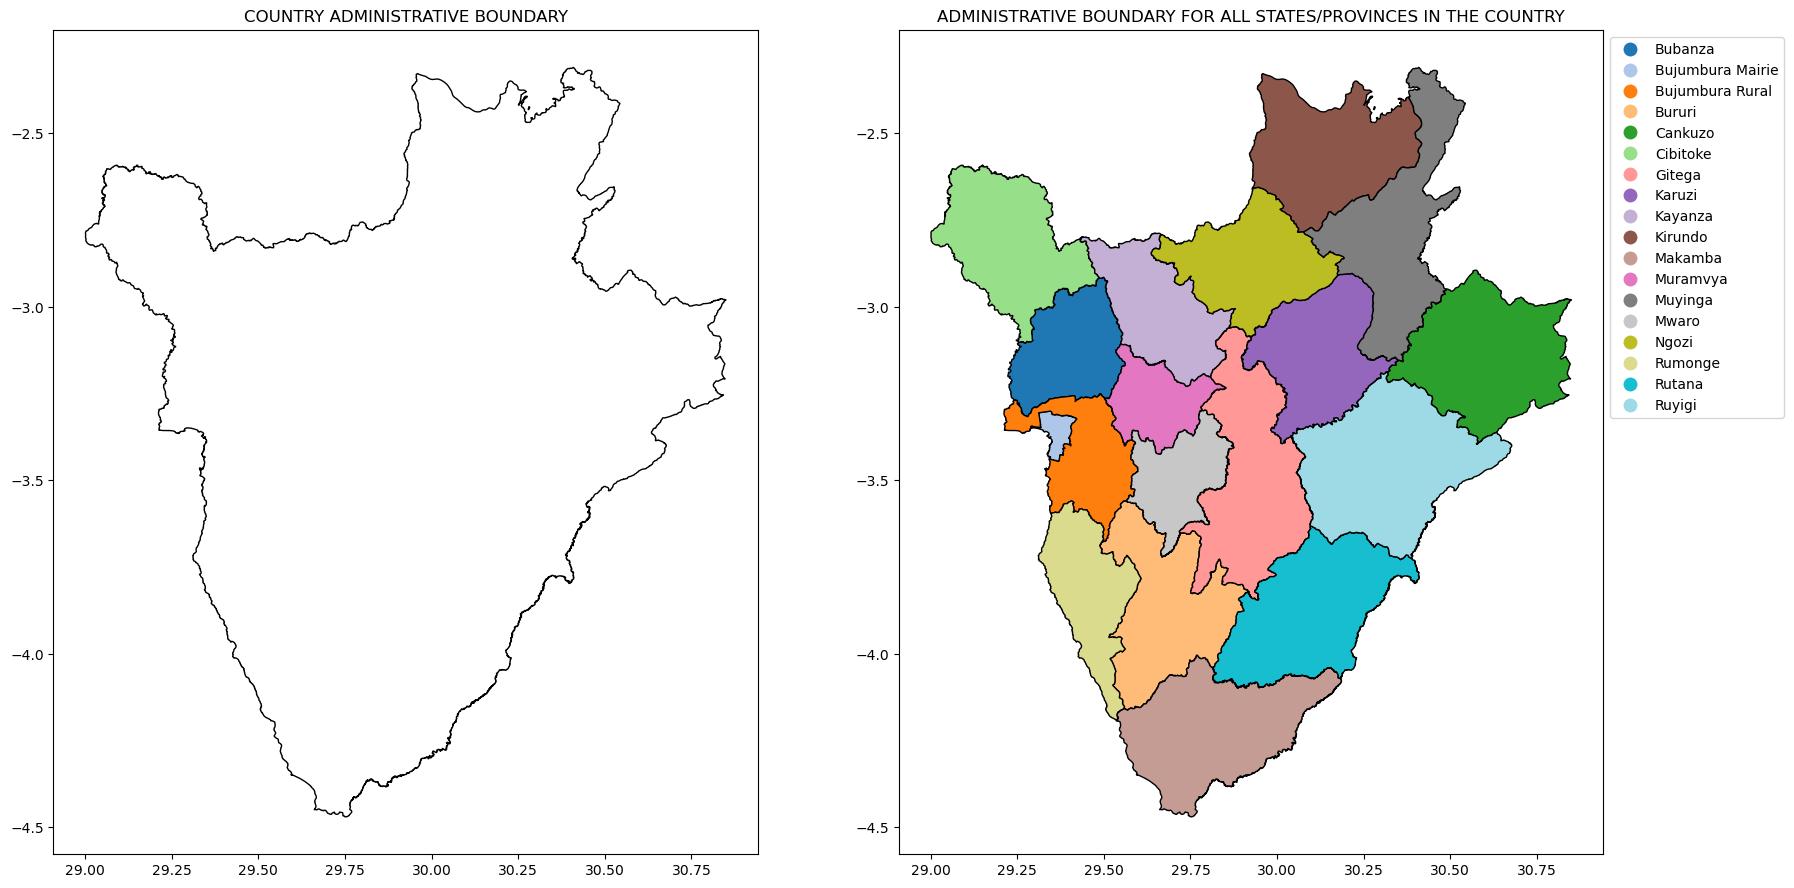

In [14]:
# Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

# Plot the administrative boundary of country in panel 1
admin.plot(ax=ax1, color="none", edgecolor="black")
ax1.set_title("COUNTRY ADMINISTRATIVE BOUNDARY")

# Plot the administrative boundaries of all states/territories in panel 2
adminstates.plot(ax=ax2,column="name", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("ADMINISTRATIVE BOUNDARY FOR ALL STATES/PROVINCES IN THE COUNTRY")

# Display plot
plt.show()

**Observation**

The plot above illustrates the administrative boundary of Burundi, alongside the administrative boundaries of all its states/provinces.

In [15]:
# Get the total area for country

# Replace EPSG:4326 with a projects CRS of 32735
projected_crs = "EPSG:32735"

# Re-project geometries to a projected CRS
admin = admin.to_crs(projected_crs)

# Get the total area of country in sqm of the new CRS
total_area = admin["geometry"].area.sum()

print(f"Total Area: {total_area} sqm")

Total Area: 25018465479.5507 sqm


In [16]:
# Check the for the largest state in sqm

# Re-project geometries to a projected CRS
adminstates = adminstates.to_crs(projected_crs)

# Calculate and print the area for each geometry 
adminstates["area"] = adminstates.geometry.area

In [17]:
# Convert 'timestamp_column' to strings before passing them to Folium.
adminstates["timestamp"] = adminstates["timestamp"].dt.strftime("%Y-%m-%d %H:%M:%S")
# Create an interactive map of the states/pronvinces showing their respective areas
adminstates.explore()

In [18]:
# Reproject geometries to original CRS for admin
original_crs = "EPSG:4326"
admin = admin.to_crs(original_crs)

# Reproject geometries to original CRS for adminstates
adminstates = adminstates.to_crs(original_crs)

    3.1 PROTECTED AREAS

In [19]:
# Access world protected areas datasets using file path
wdpa = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\WDPA_WDOECM_wdpa_gdb_polygons\WDPA_WDOECM_wdpa_gdb_polygons.shx")

In [20]:
# Read the shapefile into geodataframe
protected_areas = gpd.read_file(wdpa)

In [21]:
protected_areas.head(2)

WDPAID  WDPA_PID PA_DEF  \
0   10715.0     10715      1   
1  209777.0  209777_E      1   

                                                NAME              ORIG_NAME  \
0                                         Kronotskiy             Kronotskiy   
1  Sarali Land between Rivers / Great Volzhsko-Ka...  Great Volzhsko-Kamsky   

                          DESIG                     DESIG_ENG     DESIG_TYPE  \
0  UNESCO-MAB Biosphere Reserve  UNESCO-MAB Biosphere Reserve  International   
1  UNESCO-MAB Biosphere Reserve  UNESCO-MAB Biosphere Reserve  International   

         IUCN_CAT        INT_CRIT  ...     MANG_AUTH     MANG_PLAN  \
0  Not Applicable  Not Applicable  ...  Not Reported  Not Reported   
1  Not Applicable  Not Applicable  ...  Not Reported  Not Reported   

            VERIF  METADATAID  SUB_LOC PARENT_ISO  ISO3       SUPP_INFO  \
0  State Verified         840   RU-KAM        RUS   RUS  Not Applicable   
1  State Verified         840    RU-TA        RUS   RUS  Not Applicable   

         CONS_OBJ                                           geometry  
0  Not Applicable  MULTIPOLYGON (((160.49655 55.17709, 160.49907 ...  
1  Not Applicable  POLYGON ((49.30487 55.36806, 49.30433 55.37184...  

[2 rows x 31 columns]

In [22]:
# Filter data for country
ctry_protected_areas = protected_areas[protected_areas["PARENT_ISO"] == "BDI"]

In [23]:
ctry_protected_areas.head(2)

WDPAID WDPA_PID PA_DEF               NAME          ORIG_NAME  \
37311  9168.0     9168      1   Chutes de Karera   Chutes de Karera   
37314  9167.0     9167      1  Faille de Nyakazu  Faille de Nyakazu   

                  DESIG        DESIG_ENG DESIG_TYPE IUCN_CAT        INT_CRIT  \
37311  Monument Naturel  Nature Monument   National      III  Not Applicable   
37314  Monument Naturel  Nature Monument   National      III  Not Applicable   

       ... MANG_AUTH  MANG_PLAN           VERIF  METADATAID  SUB_LOC  \
37311  ...      OBPE         No  State Verified        1956    BI-RT   
37314  ...      OBPE         No  State Verified        1956    BI-KR   

      PARENT_ISO  ISO3       SUPP_INFO        CONS_OBJ  \
37311        BDI   BDI  Not Applicable  Not Applicable   
37314        BDI   BDI  Not Applicable  Not Applicable   

                                                geometry  
37311  POLYGON ((30.07537 -3.83196, 30.07561 -3.83173...  
37314  POLYGON ((30.12617 -3.89501, 30.12709 -3.89539...  

[2 rows x 31 columns]

    3.11 UNDERSTAND THE DATA

In [24]:
# Check no.of rows and columns for world protected areas dataframe
protected_areas.shape

(240165, 31)

The dataframe has 240165 rows and 31 columns.

In [25]:
# Check no.of rows and columns for ctry's protected areas dataframe
ctry_protected_areas.shape

(14, 31)

The dataframe has 14 rows and 31 columns.

In [26]:
# Check for unique value and their counts in the selected column
ctry_protected_areas["DESIG"].value_counts()

Réserve Naturelle    6
Parc National        3
Paysage Protégé      3
Monument Naturel     2
Name: DESIG, dtype: int64

This shows the unique values and respective counts in the "Desig" column.

In [27]:
# View all column titles in the dataframe
ctry_protected_areas.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [28]:
# Check the data-type of each column
ctry_protected_areas.dtypes

WDPAID         float64
WDPA_PID        object
PA_DEF          object
NAME            object
ORIG_NAME       object
DESIG           object
DESIG_ENG       object
DESIG_TYPE      object
IUCN_CAT        object
INT_CRIT        object
MARINE          object
REP_M_AREA     float64
GIS_M_AREA     float64
REP_AREA       float64
GIS_AREA       float64
NO_TAKE         object
NO_TK_AREA     float64
STATUS          object
STATUS_YR        int64
GOV_TYPE        object
OWN_TYPE        object
MANG_AUTH       object
MANG_PLAN       object
VERIF           object
METADATAID       int64
SUB_LOC         object
PARENT_ISO      object
ISO3            object
SUPP_INFO       object
CONS_OBJ        object
geometry      geometry
dtype: object

The above shows the data types for each column.

In [29]:
# Check information about the dataframe
ctry_protected_areas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14 entries, 37311 to 37334
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   WDPAID      14 non-null     float64 
 1   WDPA_PID    14 non-null     object  
 2   PA_DEF      14 non-null     object  
 3   NAME        14 non-null     object  
 4   ORIG_NAME   14 non-null     object  
 5   DESIG       14 non-null     object  
 6   DESIG_ENG   14 non-null     object  
 7   DESIG_TYPE  14 non-null     object  
 8   IUCN_CAT    14 non-null     object  
 9   INT_CRIT    14 non-null     object  
 10  MARINE      14 non-null     object  
 11  REP_M_AREA  14 non-null     float64 
 12  GIS_M_AREA  14 non-null     float64 
 13  REP_AREA    14 non-null     float64 
 14  GIS_AREA    14 non-null     float64 
 15  NO_TAKE     14 non-null     object  
 16  NO_TK_AREA  14 non-null     float64 
 17  STATUS      14 non-null     object  
 18  STATUS_YR   14 non-null     int64   


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64' and 'float64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [30]:
# Check the coordinate system of the dataframe
ctry_protected_areas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate system of the dataframe is 4326, which is the WGS 84 coordinate system.

In [31]:
# Check the geometric type of the dataframe
ctry_protected_areas.geom_type

37311         Polygon
37314         Polygon
37315    MultiPolygon
37316    MultiPolygon
37320         Polygon
37321         Polygon
37322    MultiPolygon
37323         Polygon
37324         Polygon
37326         Polygon
37327         Polygon
37330         Polygon
37333         Polygon
37334         Polygon
dtype: object

The dataframe has records for both multipolygon and polygon geometric type.

    3.12 COMPREHENSIVE ANALYSIS

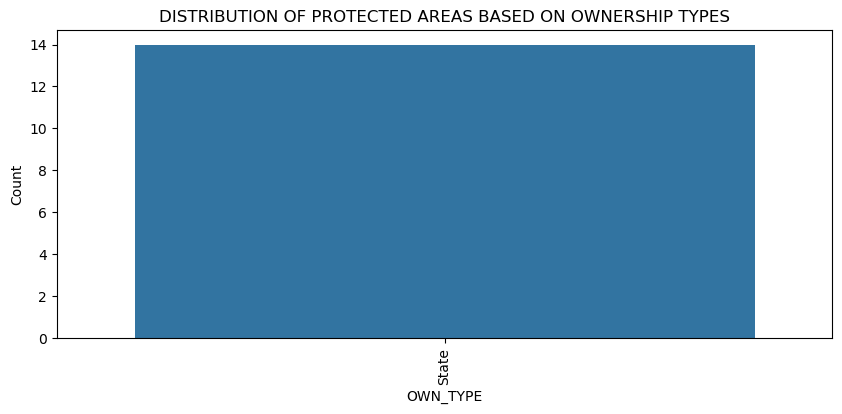

In [32]:
# Check distribution of ownership type of protected areas
plt.figure(figsize=(10, 4))
sns.countplot(x="OWN_TYPE",
              data=ctry_protected_areas,
              order=ctry_protected_areas["OWN_TYPE"].value_counts().index,
              color="#1f77b4")
plt.xticks(rotation=90)
plt.title("DISTRIBUTION OF PROTECTED AREAS BASED ON OWNERSHIP TYPES")
plt.xlabel("OWN_TYPE")
plt.ylabel("Count")

# Display plot
plt.show()

**Observation**

All of the country's protected areas are categorized as state-owned, indicating a government owned ownership structure.

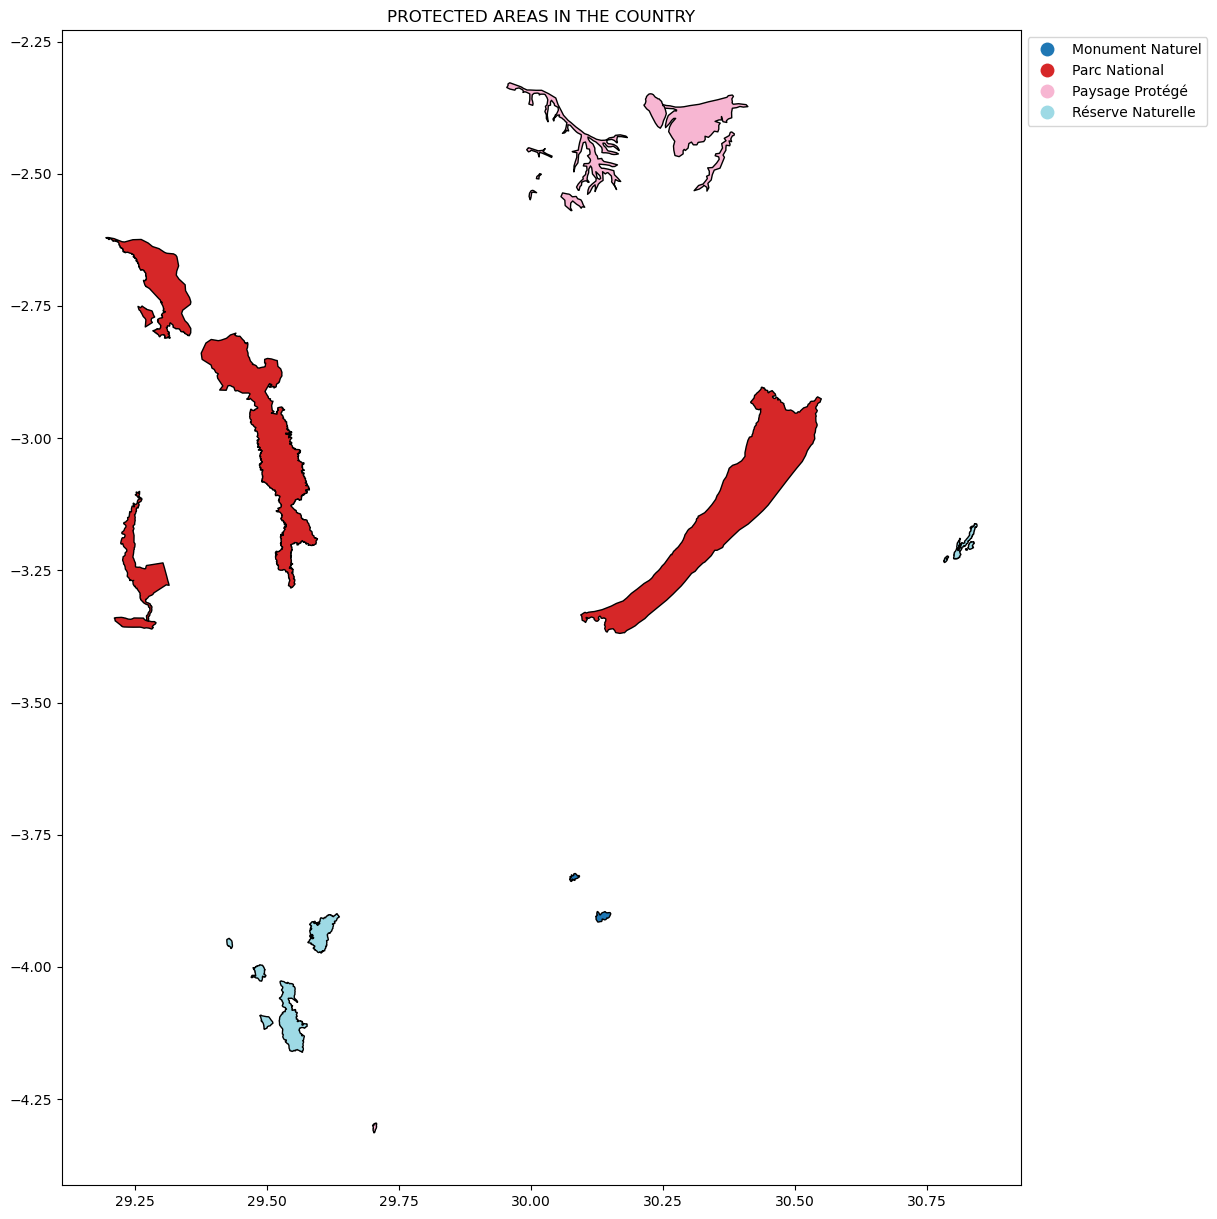

In [33]:
# Create plot
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the protected areas
ctry_protected_areas.plot(ax=ax, cmap="tab20", column="DESIG", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("PROTECTED AREAS IN THE COUNTRY")

# Display plot
plt.show()

**Observation**

The map illustrates the distribution of 4 distinct protected areas in Burundi. Notably, the Parc National emerges as the most prevalent protected area, with a total of 3 occurrences throughout the country.

    3.2 ROADS

In [34]:
# Read the json into geodataframe
open_globalroads = geo_data["open_globalroads"]

In [35]:
open_globalroads.head(2)

OBJECTID ONME  FCLASS  SRFTPE  ISSEASONAL  CURNTPRAC  GDWTHRPRAC  \
0         1  NaN       0     0.0         0.0        NaN         NaN   
1         2  NaN       0     0.0         0.0        NaN         NaN   

   SUM_LENGTH_KM                                           geometry  
0    16686.65607  LINESTRING (-66.82451 17.98029, -66.82455 17.9...  
1    16686.65607  LINESTRING (-66.62012 17.98131, -66.62126 17.9...

In [36]:
# Extract information for ctry roads only
# Overlay to get roads within ctry's boundaries
ctry_roads = gpd.overlay(open_globalroads, admin, how="intersection")

# Display the information for ctry
ctry_roads.head(2)

OBJECTID ONME  FCLASS  SRFTPE  ISSEASONAL  CURNTPRAC  GDWTHRPRAC  \
0    261204            0     0.0         0.0        0.0         0.0   
1    261205            0     0.0         0.0        0.0         0.0   

   SUM_LENGTH_KM country ISO3166_2     name   enname  locname  \
0   6.113355e+06     BDI            Burundi  Burundi  Burundi   
1   6.113355e+06     BDI            Burundi  Burundi  Burundi   

                 offname        boundary  adminlevel wikidata    wikimedia  \
0  Republika y'u Burundi  administrative           2     Q967  rn:Uburundi   
1  Republika y'u Burundi  administrative           2     Q967  rn:Uburundi   

            timestamp                                           geometry  
0 2019-10-09 22:03:02  LINESTRING (29.75452 -4.41937, 29.75390 -4.420...  
1 2019-10-09 22:03:02  LINESTRING (29.75452 -4.41937, 29.75497 -4.419...

    3.21 UNDERSTAND THE DATA

In [37]:
# Check no.of rows and columns for global roads dataframe
open_globalroads.shape

(1101300, 9)

In [38]:
# Check no.of rows and columns for ctry's roads dataframe
ctry_roads.shape

(12243, 20)

The increase in the number of columns is attributed to the overlay performed within the country's boundaries.

In [39]:
# Check for unique value and their counts in the selected column
ctry_roads["FCLASS"].value_counts()

0    12242
6        1
Name: FCLASS, dtype: int64

This shows the unique values and respective counts in the "FCLASS" column.

In [40]:
# View all column titles in the dataframe
ctry_roads.columns

Index(['OBJECTID', 'ONME', 'FCLASS', 'SRFTPE', 'ISSEASONAL', 'CURNTPRAC',
       'GDWTHRPRAC', 'SUM_LENGTH_KM', 'country', 'ISO3166_2', 'name', 'enname',
       'locname', 'offname', 'boundary', 'adminlevel', 'wikidata', 'wikimedia',
       'timestamp', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [41]:
# Check the data-type of each column
ctry_roads.dtypes

OBJECTID                  int64
ONME                     object
FCLASS                    int64
SRFTPE                  float64
ISSEASONAL              float64
CURNTPRAC               float64
GDWTHRPRAC              float64
SUM_LENGTH_KM           float64
country                  object
ISO3166_2                object
name                     object
enname                   object
locname                  object
offname                  object
boundary                 object
adminlevel                int64
wikidata                 object
wikimedia                object
timestamp        datetime64[ns]
geometry               geometry
dtype: object

The above shows the data types for each column.

In [42]:
# Check information about the dataframe
ctry_roads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12243 entries, 0 to 12242
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OBJECTID       12243 non-null  int64         
 1   ONME           12243 non-null  object        
 2   FCLASS         12243 non-null  int64         
 3   SRFTPE         12243 non-null  float64       
 4   ISSEASONAL     12243 non-null  float64       
 5   CURNTPRAC      12243 non-null  float64       
 6   GDWTHRPRAC     12243 non-null  float64       
 7   SUM_LENGTH_KM  12243 non-null  float64       
 8   country        12243 non-null  object        
 9   ISO3166_2      12243 non-null  object        
 10  name           12243 non-null  object        
 11  enname         12243 non-null  object        
 12  locname        12243 non-null  object        
 13  offname        12243 non-null  object        
 14  boundary       12243 non-null  object        
 15  adminlevel 

This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64' and 'float64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [43]:
# Check the coordinate system of the dataframe
ctry_roads.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate system of the dataframe is 4326, which is the WGS 84 coordinate system.

In [44]:
# Check the geometric type of the dataframe
ctry_roads.geom_type

0        LineString
1        LineString
2        LineString
3        LineString
4        LineString
            ...    
12238    LineString
12239    LineString
12240    LineString
12241    LineString
12242    LineString
Length: 12243, dtype: object

The records for the dataframe has the linestring geometric type.

     3.22 COMPREHENSIVE ANALYSIS

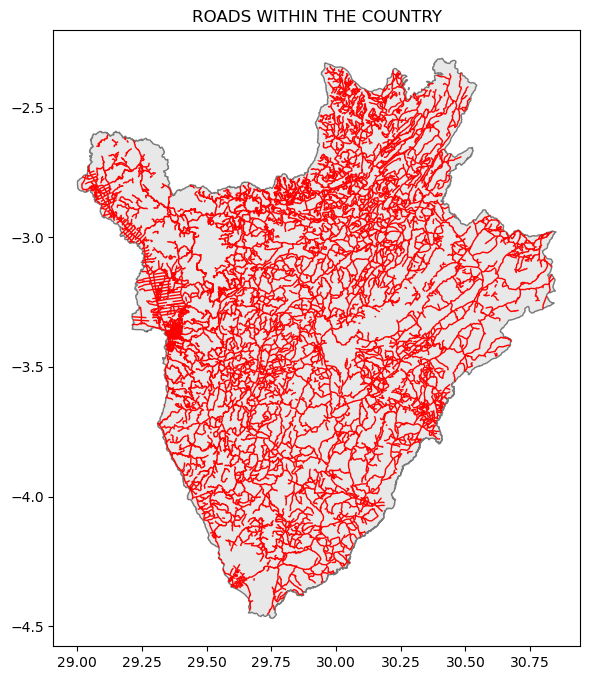

In [45]:
# Plot ctry's boundaries and the roads
fig, ax = plt.subplots(figsize=(12, 8))

# Plot ctry's boundaries
admin.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

# Plot roads within ctry
ctry_roads.plot(ax=ax, color="red", linewidth=1)

plt.title("ROADS WITHIN THE COUNTRY")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18080\926017319.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("rainbow", len(road_categories))


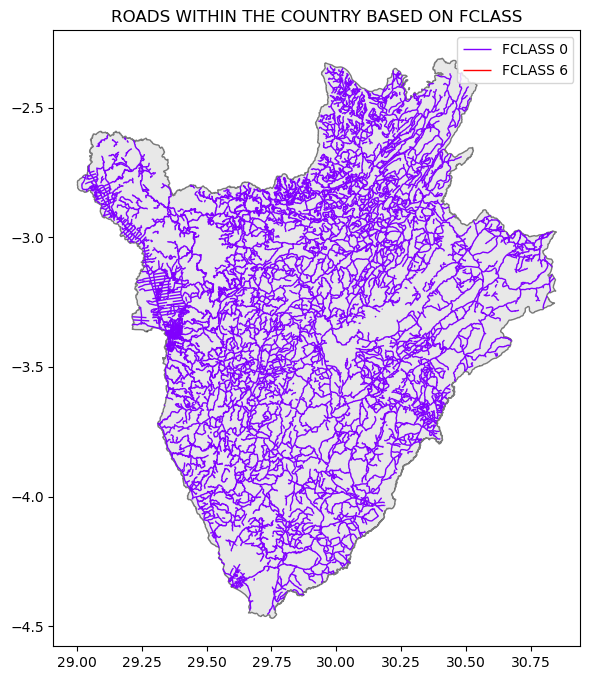

In [46]:
# Plot ctry's boundaries
fig, ax = plt.subplots(figsize=(12, 8))
admin.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

# Categorize roads based on FCLASS
road_categories = ctry_roads["FCLASS"].unique()
colors = plt.cm.get_cmap("rainbow", len(road_categories))

# Plot roads based on FCLASS
for i, category in enumerate(road_categories):
    roads_subset = ctry_roads[ctry_roads["FCLASS"] == category]
    roads_subset.plot(ax=ax, color=colors(i), linewidth=1, label=f'FCLASS {category}')

plt.title("ROADS WITHIN THE COUNTRY BASED ON FCLASS")
plt.legend()

# Dsplay plot
plt.show()

**Observation**

The observation highlights the road network infrastructure in Burundi, revealing that roads classified as FCLASS 0 are the most prevalent, while those classified as FCLASS 6 are notably scarce. This distribution pattern suggests a significant presence of unspecified roads, indicating areas where road designations may require further clarification or documentation.

     3.3 ADMINISTRATIVE OVERVIEW 

**Overview**

Burundi, with an area spanning approximately 25 billion square meters, comprises 18 provinces, with Ruyigi province being the largest in terms of size. Burundi boasts a total of 14 protected areas across 4 distinct categories, with Parc National being the most prevalent, totaling 25 occurrences nationwide. All 14 protected areas are state-owned.

In terms of infrastructure, Burundi's road network reveals an interesting pattern, with roads classified as FCLASS 0 being the most prevalent, while those categorized as FCLASS 6 ecompasses trail roads and are relatively scarce. These trail roads typically serve specialized purposes such as access to remote areas, recreational activities like hiking or biking, or ecological conservation efforts. This distribution highlights a significant presence of unspecified roads, signaling areas where further clarification or documentation of road designations may be necessary. Addressing these data quality issues is essential for comprehensive analysis and effective decision-making in Armenia's land sector.

#### 4. BIOCLIMATIC AND ECOLOGICAL ZONES

    4.0 BIODIVERSITY HOTSPOTS

In [47]:
# Read the json into geodataframe
biodiv_hotspots = geo_data["biodiv_hotspots"]

In [48]:
biodiv_hotspots.head(2)

OBJECTID                                           NAME          Type  \
0         1  Chilean Winter Rainfall and Valdivian Forests  hotspot area   
1         2  Chilean Winter Rainfall and Valdivian Forests   outer limit   

   Shape_Length  Shape_Area                                           geometry  
0    200.706891   40.754665  MULTIPOLYGON (((-74.59792 -46.92502, -74.61111...  
1    191.174978  186.085694  POLYGON ((-70.30946 -22.96028, -70.48596 -22.7...

In [49]:
# Extract information for ctry's biodiversity hotspots
ctry_biohotspots = biodiv_hotspots.clip(admin)
ctry_biohotspots = ctry_biohotspots.reset_index(drop=True)

In [50]:
ctry_biohotspots.head(2)

OBJECTID                 NAME          Type  Shape_Length  Shape_Area  \
0        35  Eastern Afromontane  hotspot area    274.766663   82.812834   

                                            geometry  
0  MULTIPOLYGON (((29.88903 -4.35668, 29.88842 -4...

    4.O1 UNDERSTAND THE DATA

In [51]:
# Check no.of rows and columns for global biodiversity hotspots dataframe
biodiv_hotspots.shape

(53, 6)

The dataframe has 53 rows and 6 columns.

In [52]:
# Check no.of rows and columns for ctry's biodiversity hotspots dataframe
ctry_biohotspots.shape

(1, 6)

The data frame has 1 row and 6 columns

In [53]:
# View all column titles in the dataframe
ctry_biohotspots.columns

Index(['OBJECTID', 'NAME', 'Type', 'Shape_Length', 'Shape_Area', 'geometry'], dtype='object')

The above shows the names of the columns.

In [54]:
# Check the data-type of each column
ctry_biohotspots.dtypes

OBJECTID           int64
NAME              object
Type              object
Shape_Length     float64
Shape_Area       float64
geometry        geometry
dtype: object

The above shows the data types for each column.

In [55]:
# Check information about the dataframe
ctry_biohotspots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      1 non-null      int64   
 1   NAME          1 non-null      object  
 2   Type          1 non-null      object  
 3   Shape_Length  1 non-null      float64 
 4   Shape_Area    1 non-null      float64 
 5   geometry      1 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 180.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64' and 'float 64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [56]:
# Check the coordinate system of the dataframe
ctry_biohotspots.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate system of the dataframe is 4326, which is the WGS 84 coordinate system.

In [57]:
# Check the geometric type of the dataframe
ctry_biohotspots.geom_type

0    MultiPolygon
dtype: object

The records for the dataframe has the multipolygon geometric type.

    4.02 COMPREHENSIVE ANALYSIS

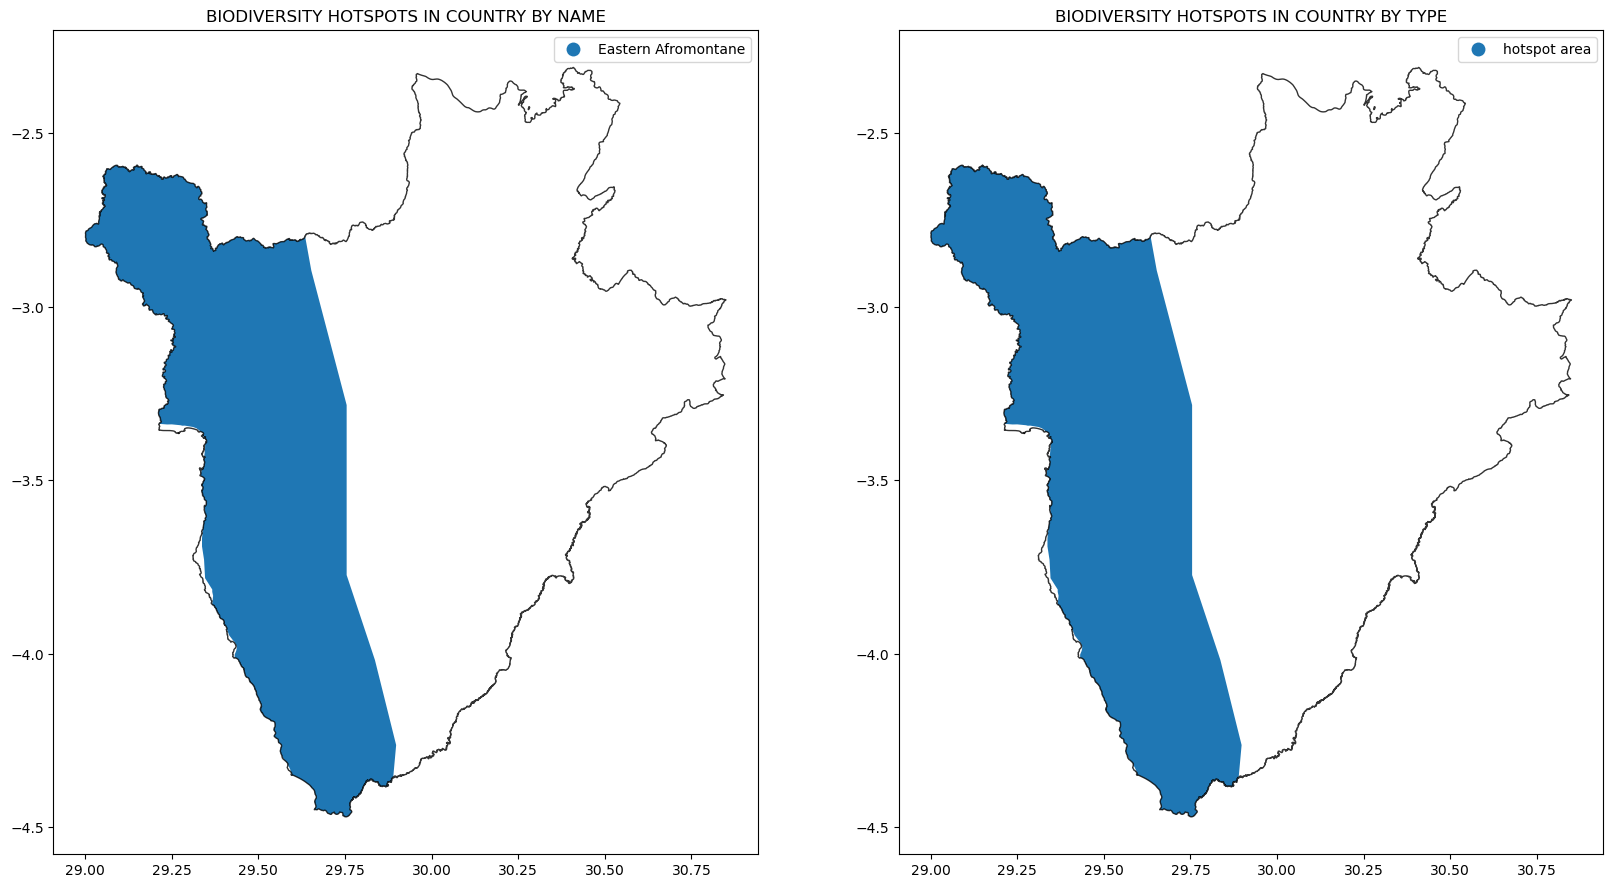

In [58]:
 # Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

# Plot the hotspots by name in panel 1
ctry_biohotspots.plot(column="NAME", cmap="tab20", ax=ax1, legend=True)
admin.plot(ax=ax1, color="none", edgecolor="black", alpha = 0.8)
ax1.set_title("BIODIVERSITY HOTSPOTS IN COUNTRY BY NAME")

# Plot the hotspots by type in panel 2
ctry_biohotspots.plot(column="Type", cmap="tab20", ax=ax2, legend=True)
admin.plot(ax=ax2, color="none", edgecolor="black", alpha = 0.8)
ax2.set_title("BIODIVERSITY HOTSPOTS IN COUNTRY BY TYPE")

# Display the plot
plt.show()

**Observation**

Burundi harbors only one distinct biodiversity hotspots, which is the Eastern Afromontane.

    4.1 ECOLOGICAL ZONES

In [59]:
# Read geojson file into a geodataframe
gez = geo_data["gez"]

In [60]:
gez.head(2)

country ISO3166_2     name                  gez_name  gez_code gez_abbrev  \
0     BDI            Burundi     Tropical moist forest        12       TAwa   
1     BDI            Burundi  Tropical mountain system        16         TM   

   adminlevel                                           geometry  
0           2  MULTIPOLYGON (((29.36263 -3.83992, 29.36256 -3...  
1           2  MULTIPOLYGON (((30.28191 -2.42298, 30.28172 -2...

In [61]:
# Read geojson file into a geodataframe
gezstates = geo_data["gezstates"]

In [62]:
gezstates.head(2)

country ISO3166_2              name               gez_name  gez_code  \
0     BDI     BI-BB           Bubanza  Tropical moist forest        12   
1     BDI     BI-BM  Bujumbura Mairie  Tropical moist forest        12   

  gez_abbrev  adminlevel                                           geometry  
0       TAwa           4  POLYGON ((29.27509 -3.10260, 29.27508 -3.10261...  
1       TAwa           4  POLYGON ((29.40608 -3.31473, 29.40603 -3.31472...

    4.11 UNDERSTAND THE DATA

        COUNTRY ECOLOGICAL ZONES

In [63]:
# Check for unique value and their counts in the selected column
gez["gez_name"].value_counts()

Tropical moist forest       1
Tropical mountain system    1
Water                       1
Name: gez_name, dtype: int64

In [64]:
# Check no.of rows and columns for ctry's ecological zones
gez.shape

(3, 8)

The dataframe has 3 rows and 8 columns.

In [65]:
# View all column titles in the dataframe
gez.columns

Index(['country', 'ISO3166_2', 'name', 'gez_name', 'gez_code', 'gez_abbrev',
       'adminlevel', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [66]:
# Check information about the dataframe
gez.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     3 non-null      object  
 1   ISO3166_2   3 non-null      object  
 2   name        3 non-null      object  
 3   gez_name    3 non-null      object  
 4   gez_code    3 non-null      int64   
 5   gez_abbrev  3 non-null      object  
 6   adminlevel  3 non-null      int64   
 7   geometry    3 non-null      geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 324.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [67]:
# Check the coordinate system of the dataframe
gez.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate system of the dataframe is 4326, which is the WGS 84 coordinate system.

In [68]:
# Check the geometric type of the dataframe
gez.geom_type

0    MultiPolygon
1    MultiPolygon
2         Polygon
dtype: object

The records for the dataframe has both the multipolygon and polygon geometric type.

       ALL STATES ECOLOGICAL ZONES

In [69]:
gezstates["gez_name"].value_counts()

Tropical mountain system    18
Tropical moist forest        9
Water                        1
Name: gez_name, dtype: int64

This analysis shows the unique values and respective counts in the "gez_name" column on state levels for the country.

Note: Further analyses on states ecological zones is deemed unnecessary to avoid redundancy.

    4.12 COMPREHENSIVE ANALYSIS

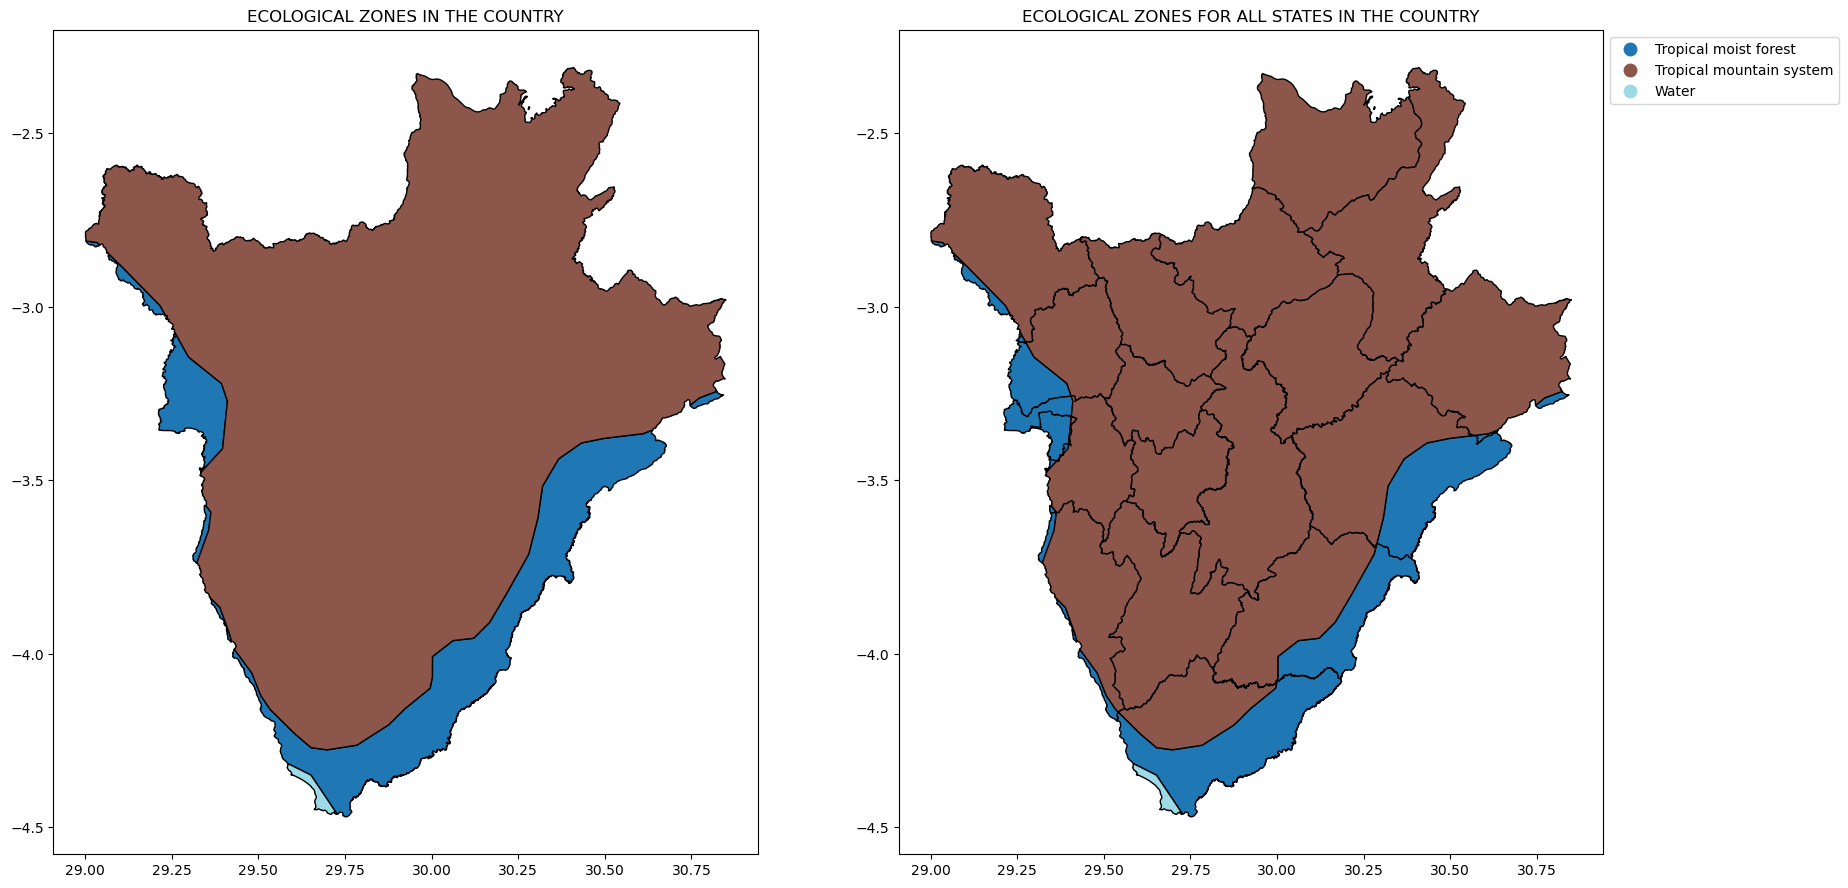

In [70]:
# Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

# Plot the ecological zones of ctry in panel 1
gez.plot(ax=ax1, cmap="tab20", column="gez_name", edgecolor="black")
ax1.set_title("ECOLOGICAL ZONES IN THE COUNTRY")

# Plot the ecological zones of all states in panel 2
gezstates.plot(ax=ax2,column="gez_name", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("ECOLOGICAL ZONES FOR ALL STATES IN THE COUNTRY")

# Display plot
plt.show()

**Observation**

Burund's ecological landscape reveals the Tropical mountain system as its largest ecological zone, spanning across all territories within the country. Interestingly, certain territories exhibit a combination of two distinct ecological zones, adding to the complexity of Burundi's environmental makeup. Moreover, water plays a significant role as part of the ecological zone in this country, highlighting the interconnectedness of land and water systems in shaping Burundi's natural environment.

    4.2 AGROECOLOGICAL ZONES

In [71]:
# Read geojson file into a geodataframe
aeczones = geo_data["aeczones"]

In [72]:
aeczones.head(2)

Value                                           geometry
0      1  POLYGON ((-33.50000 83.65000, -33.50000 83.500...
1      1  POLYGON ((-37.85000 83.60000, -37.85000 83.500...

    4.21 UNDERSTAND THE DATA

In [73]:
# Check no.of rows and columns for global ecological zones
aeczones.shape

(116675, 2)

In [74]:
# Check for unique values present in the value column
aeczones["Value"].unique()

array([ 1,  2, 18, 14, 11, 12, 13,  5, 10,  9, 17,  8, 16, 15,  4,  6,  7,
        3], dtype=int64)

This shows the unique values and respective counts in the "Value" column.

In [75]:
# Fix the data and replace numbers with acgroecological zones

values = {"1": "Tropical-Arid", "2": "Tropical-Dry Semi-Arid", "3": "Tropical -Moist Semi-Arid", "4": "Tropical-Sub-Humid", "5": "Tropical-Humid", 
          "6": "Tropical-Humid (year round)", "7": "Temperate-Arid", "8": "Temperate-Dry Semi-Arid", "9": "Temperate-Moist Semi-Arid", 
          "10": "Temperate-Sub-Humid", "11": "Temperate-Humid", "12": "Temperate-Humid (year round)", "13": "Boreal-Arid", 
          "14": "Boreal-Dry Semi-Arid", "15": "Boreal-Moist Semi-Arid", "16": "Boreal-Sub-humid", "17": "Boreal-Humid", 
          "18": "Boreal-Humid (year round)"}

In [76]:
# Standardize the column names
aeczones.columns = aeczones.columns.str.lower()

In [77]:
# Rename class name
aeczones.value = aeczones.value.astype("str").replace(values)

In [78]:
# Check to see replaced values
aeczones.head(2)

value                                           geometry
0  Tropical-Arid  POLYGON ((-33.50000 83.65000, -33.50000 83.500...
1  Tropical-Arid  POLYGON ((-37.85000 83.60000, -37.85000 83.500...

In [79]:
# Extract ctry's agroecological zones
ctry_aeczones = aeczones.clip(admin)
ctry_aeczones = ctry_aeczones.reset_index(drop=True)

In [80]:
ctry_aeczones.head(2)

value  \
0  Boreal-Humid (year round)   
1              Tropical-Arid   

                                            geometry  
0  MULTIPOLYGON (((29.60000 -4.15000, 29.60000 -4...  
1  POLYGON ((29.75000 -4.40000, 29.75000 -4.46860...

In [81]:
# Check for the no. of rows and columns in the dataframe
ctry_aeczones.shape

(44, 2)

In [82]:
# View all column titles in the dataframe
ctry_aeczones.columns

Index(['value', 'geometry'], dtype='object')

The above shows the names of the columns.

In [83]:
# Check for unique value and their counts in the selected column
ctry_aeczones["value"].value_counts()

Boreal-Arid                     14
Temperate-Humid (year round)     9
Boreal-Dry Semi-Arid             8
Tropical-Arid                    7
Boreal-Humid (year round)        3
Tropical-Humid                   1
Tropical-Sub-Humid               1
Boreal-Sub-humid                 1
Name: value, dtype: int64

This shows the unique values and respective counts in the "value" column.

In [84]:
# Check the data-type of each column
ctry_aeczones.dtypes

value         object
geometry    geometry
dtype: object

The above shows the data types for each column.

In [85]:
# Check information about the dataframe
ctry_aeczones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   value     44 non-null     object  
 1   geometry  44 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 836.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [86]:
# Check the coordinate system of the dataframe
ctry_aeczones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate System of the dataframe is 4326, which is the WGS 84 Coordinate System.

In [87]:
# Check the geometric type of the dataframe
ctry_aeczones.geom_type

0     MultiPolygon
1          Polygon
2          Polygon
3     MultiPolygon
4          Polygon
5          Polygon
6          Polygon
7          Polygon
8          Polygon
9          Polygon
10         Polygon
11         Polygon
12         Polygon
13         Polygon
14         Polygon
15         Polygon
16         Polygon
17    MultiPolygon
18         Polygon
19         Polygon
20         Polygon
21         Polygon
22         Polygon
23         Polygon
24         Polygon
25         Polygon
26         Polygon
27         Polygon
28         Polygon
29         Polygon
30         Polygon
31         Polygon
32         Polygon
33         Polygon
34    MultiPolygon
35         Polygon
36    MultiPolygon
37    MultiPolygon
38    MultiPolygon
39         Polygon
40         Polygon
41    MultiPolygon
42         Polygon
43         Polygon
dtype: object

The records for the dataframe have the polygon and multipolgon geometric type.

    4.22 COMPREHENSIVE ANALYSIS

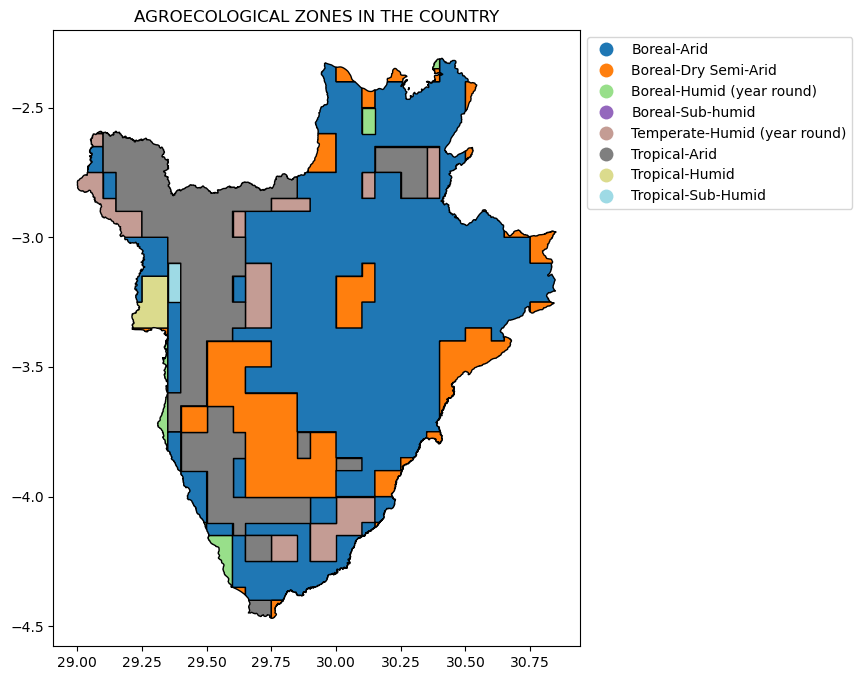

In [88]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the agroecological zones
ctry_aeczones.plot(ax=ax, cmap="tab20", column="value", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("AGROECOLOGICAL ZONES IN THE COUNTRY")

# Display plot
plt.show()

**Observation**

n Burundi, the Boreal-Arid agroecological zone stands out with the largest geographical coverage and the highest frequency among all agroecological zones. This observation suggests that a significant portion of Burundi's landscape is characterized by environmental conditions typical of the Boreal-Arid zone. The prevalence of this zone would have implications for agricultural practices, land use planning, and natural resource management in the country. 

    4.3 HOLDRIDGE LIFEZONES

In [89]:
# Read geojson file into a geodataframe
hldridge = geo_data["hldridge"]

In [90]:
hldridge.head(2)

FID    AREA  PERIMETER  HOLDRIG_  HOLDRIG_ID  ZONE  CASE_  FREQUENCY  \
0    0  240.50        173         2        3695     1      2         13   
1    1    1.25          6         3         110     2      3        232   

           DESC  SYMBOL                                           geometry  
0           Ice       5  POLYGON ((-61.00000 81.00000, -61.50000 81.000...  
1  Polar desert       5  POLYGON ((-80.50000 83.00000, -81.00000 83.000...

In [91]:
# Extract information for ctry's holdridge
ctry_hldridge = hldridge.clip(admin)
ctry_hldridge = ctry_hldridge.reset_index(drop=True)

In [92]:
ctry_hldridge.head(2)

FID  AREA  PERIMETER  HOLDRIG_  HOLDRIG_ID  ZONE  CASE_  FREQUENCY  \
0  3838  6.75         13      3840        4661    29     30        238   
1  3863  0.50          3      3865        4662     0      1        122   

                       DESC  SYMBOL  \
0  Subtropical moist forest      78   
1                                 0   

                                            geometry  
0  POLYGON ((29.50000 -4.00000, 29.50000 -3.50000...  
1  POLYGON ((29.50000 -4.00000, 29.50000 -4.12688...

    4.31 UNDERSTAND THE DATA

In [93]:
# Check no.of rows and columns for global holdridge life zones
hldridge.shape

(4831, 11)

The dataframe has 4831 rows and 11 columns

In [94]:
# Check no.of rows and columns for ctry's holdridge life zones
ctry_hldridge.shape

(5, 11)

In [95]:
# View all column titles in the dataframe
ctry_hldridge.columns

Index(['FID', 'AREA', 'PERIMETER', 'HOLDRIG_', 'HOLDRIG_ID', 'ZONE', 'CASE_',
       'FREQUENCY', 'DESC', 'SYMBOL', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [96]:
# Check for unique value and their counts in the selected column
ctry_hldridge["DESC"].value_counts()

Subtropical moist forest    2
Subtropical dry forest      2
                            1
Name: DESC, dtype: int64

This shows the unique values and respective counts in the "DESC" column.

In [97]:
# Check the data-type of each column
ctry_hldridge.dtypes

FID              int64
AREA           float64
PERIMETER        int64
HOLDRIG_         int64
HOLDRIG_ID       int64
ZONE             int64
CASE_            int64
FREQUENCY        int64
DESC            object
SYMBOL           int64
geometry      geometry
dtype: object

The above shows the data types for each column.

In [98]:
# Check information about the dataframe
ctry_hldridge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         5 non-null      int64   
 1   AREA        5 non-null      float64 
 2   PERIMETER   5 non-null      int64   
 3   HOLDRIG_    5 non-null      int64   
 4   HOLDRIG_ID  5 non-null      int64   
 5   ZONE        5 non-null      int64   
 6   CASE_       5 non-null      int64   
 7   FREQUENCY   5 non-null      int64   
 8   DESC        5 non-null      object  
 9   SYMBOL      5 non-null      int64   
 10  geometry    5 non-null      geometry
dtypes: float64(1), geometry(1), int64(8), object(1)
memory usage: 572.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64'  and 'float64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [99]:
# Check the coordinate system of the dataframe
ctry_hldridge.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate System of the dataframe is 4326, which is the WGS 84 Coordinate System.

In [100]:
# Check the geometric type of the dataframe
ctry_hldridge.geom_type

0         Polygon
1         Polygon
2    MultiPolygon
3         Polygon
4    MultiPolygon
dtype: object

The records for the dataframe have the polygon and multipolygon geometric type.

    4.32 COMPREHENSIVE ANALYSIS

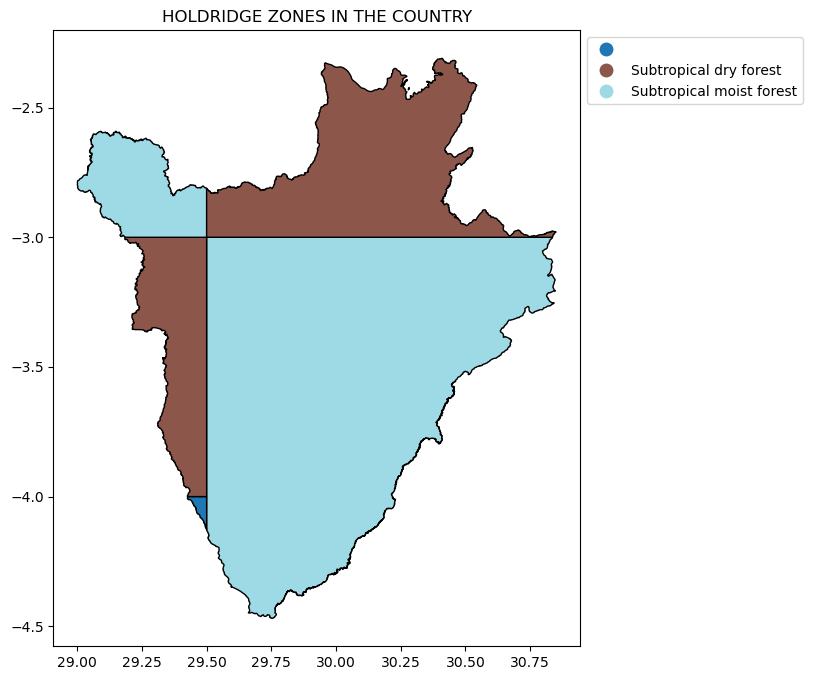

In [101]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the ctry's holdridge life zones
ctry_hldridge.plot(ax=ax, cmap="tab20", column="DESC", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("HOLDRIDGE ZONES IN THE COUNTRY")

# Display plot
plt.show()

**Observation**

Burundi displays three Holdridge life zones, with the Subtropical moist forest being the most prevalent, followed by the subtropical dry forest. However, no name is recorded for the last Holdridge life zone. This discrepancy could arise from data entry issues or incomplete documentation. 

    4.4  TERRESTIAL ECOREGIONS

In [102]:
# Read geojson file into a geodataframe
terr_ecoregion = geo_data["terr_ecoregion"]

In [103]:
terr_ecoregion.head(2)

OBJECTID_1  OBJECTID       AREA                                 ECO_NAME  \
0           1         1  29.802942  Northern Mesoamerican Pacific mangroves   
1           2         2  11.977824  Northern Mesoamerican Pacific mangroves   

  REALM  BIOME  ECO_NUM  ECO_ID  ECO_SYM  GBL_STAT  ... G200_BIOME  G200_STAT  \
0    NT     14        4   61404      119         1  ...          0          0   
1    NT     14        4   61404      119         1  ...          0          0   

   area_km2  eco_code  BIOME_1 GBL_STAT_1     REALM_1 Shape_Length Shape_Area  \
0      8174    NT1404                      Neotropics     0.219475   0.002769   
1      8174    NT1404                      Neotropics     0.193289   0.001111   

                                            geometry  
0  POLYGON ((-112.30433 29.33480, -112.29035 29.3...  
1  POLYGON ((-112.19639 29.20719, -112.19669 29.2...  

[2 rows x 22 columns]

In [104]:
# Extract information for ctry's terrestial ecoregions
ctry_ecoregion = terr_ecoregion.clip(admin)
ctry_ecoregion = ctry_ecoregion.reset_index(drop=True)

In [105]:
ctry_ecoregion.head(2)

OBJECTID_1  OBJECTID          AREA                            ECO_NAME  \
0       12164     11871  1.178711e+06  Central Zambezian Miombo woodlands   
1       11647     11318  8.348911e+04      Albertine Rift montane forests   

  REALM  BIOME  ECO_NUM  ECO_ID  ECO_SYM  GBL_STAT  ... G200_BIOME  G200_STAT  \
0    AT      7        4   30704       98         2  ...          7          2   
1    AT      1        1   30101       65         1  ...          1          1   

   area_km2  eco_code  BIOME_1 GBL_STAT_1      REALM_1 Shape_Length  \
0   1179319    AT0704                      Afrotropics   160.463407   
1    103404    AT0101                      Afrotropics    27.455918   

  Shape_Area                                           geometry  
0  97.229836  MULTIPOLYGON (((29.34273 -3.36737, 29.34079 -3...  
1   6.788359  POLYGON ((29.58565 -2.80629, 29.58683 -2.80901...  

[2 rows x 22 columns]

    4.41 UNDERSTAND THE DATA

In [106]:
# Check no.of rows and columns for world terrestial ecoregions
terr_ecoregion.shape

(14351, 22)

In [107]:
# Check no.of rows and columns for ctry's terrestial ecoregions
ctry_ecoregion.shape

(3, 22)

In [108]:
# View all column titles in the dataframe
ctry_ecoregion.columns

Index(['OBJECTID_1', 'OBJECTID', 'AREA', 'ECO_NAME', 'REALM', 'BIOME',
       'ECO_NUM', 'ECO_ID', 'ECO_SYM', 'GBL_STAT', 'G200_REGIO', 'G200_NUM',
       'G200_BIOME', 'G200_STAT', 'area_km2', 'eco_code', 'BIOME_1',
       'GBL_STAT_1', 'REALM_1', 'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [109]:
# Check for unique value and their counts in the selected column
ctry_ecoregion["ECO_NAME"].value_counts()

Central Zambezian Miombo woodlands      1
Albertine Rift montane forests          1
Victoria Basin forest-savanna mosaic    1
Name: ECO_NAME, dtype: int64

This shows the unique values and respective counts in the "ECO_NAME" column.

In [110]:
# Check the data-type of each column
ctry_ecoregion.dtypes

OBJECTID_1         int64
OBJECTID           int64
AREA             float64
ECO_NAME          object
REALM             object
BIOME              int64
ECO_NUM            int64
ECO_ID             int64
ECO_SYM            int64
GBL_STAT           int64
G200_REGIO        object
G200_NUM           int64
G200_BIOME         int64
G200_STAT          int64
area_km2           int64
eco_code          object
BIOME_1           object
GBL_STAT_1        object
REALM_1           object
Shape_Length     float64
Shape_Area       float64
geometry        geometry
dtype: object

The above shows the data types for each column.

In [111]:
# Check information about the dataframe
ctry_ecoregion.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID_1    3 non-null      int64   
 1   OBJECTID      3 non-null      int64   
 2   AREA          3 non-null      float64 
 3   ECO_NAME      3 non-null      object  
 4   REALM         3 non-null      object  
 5   BIOME         3 non-null      int64   
 6   ECO_NUM       3 non-null      int64   
 7   ECO_ID        3 non-null      int64   
 8   ECO_SYM       3 non-null      int64   
 9   GBL_STAT      3 non-null      int64   
 10  G200_REGIO    3 non-null      object  
 11  G200_NUM      3 non-null      int64   
 12  G200_BIOME    3 non-null      int64   
 13  G200_STAT     3 non-null      int64   
 14  area_km2      3 non-null      int64   
 15  eco_code      3 non-null      object  
 16  BIOME_1       3 non-null      object  
 17  GBL_STAT_1    3 non-null      object  
 18  REALM_

This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, whuch are represented with 'int64' and 'float64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [112]:
# Check the coordinate system of the dataframe
ctry_ecoregion.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate System of the dataframe is 4326, which is the WGS 84 Coordinate System.

In [113]:
# Check the geometric type of the dataframe
ctry_ecoregion.geom_type

0    MultiPolygon
1         Polygon
2    MultiPolygon
dtype: object

The records for the dataframe have polygon and multipolygon geometric type.

    4.42 COMPREHENSIVE ANALYSIS

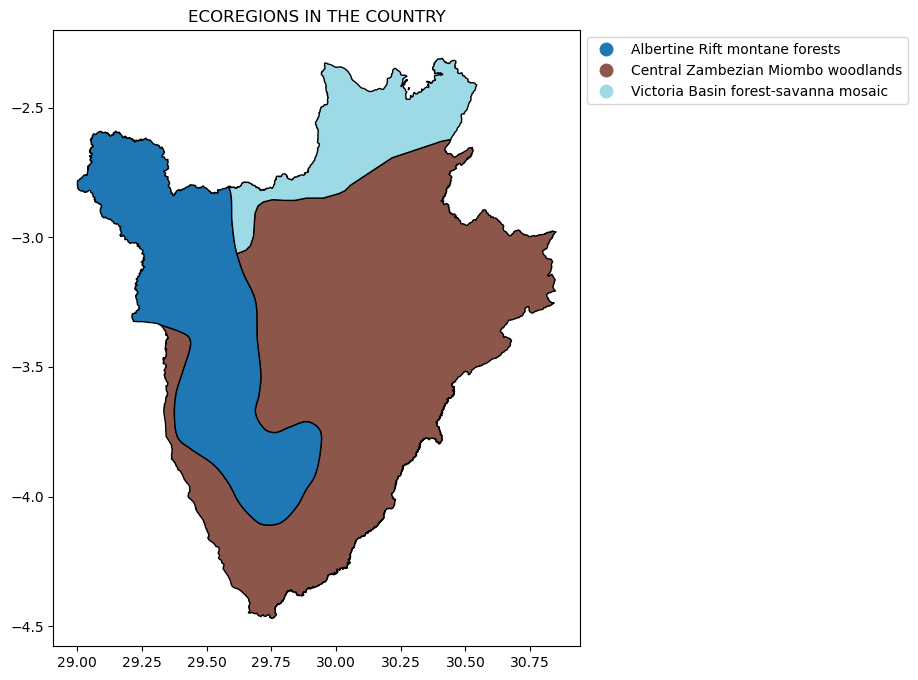

In [114]:
# Create plot for ecoregions
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the Arm's terrestial ecoregions
ctry_ecoregion.plot(ax=ax, cmap="tab20", column="ECO_NAME", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("ECOREGIONS IN THE COUNTRY")

# Display plot
plt.show()

In [115]:
# Create interactive map of the terrestial ecoregions in the country
ctry_ecoregion.explore()

**Observation**

Burundi's ecological landscape comprises three main terrestrial ecoregions, with the Central Zambezian Miombo woodlands emerging as the ecoregion with the widest coverage. Alongside this dominant ecoregion, the Albertine Rift montane forests and Victoria Basin forest-savanna mosaic also play a significant role in shaping Burundi's biodiversity and ecological dynamics.

       OVERLAPPING ANALYSIS OF ECOREGIONS AND BIODIVERSITY HOTSPOTS

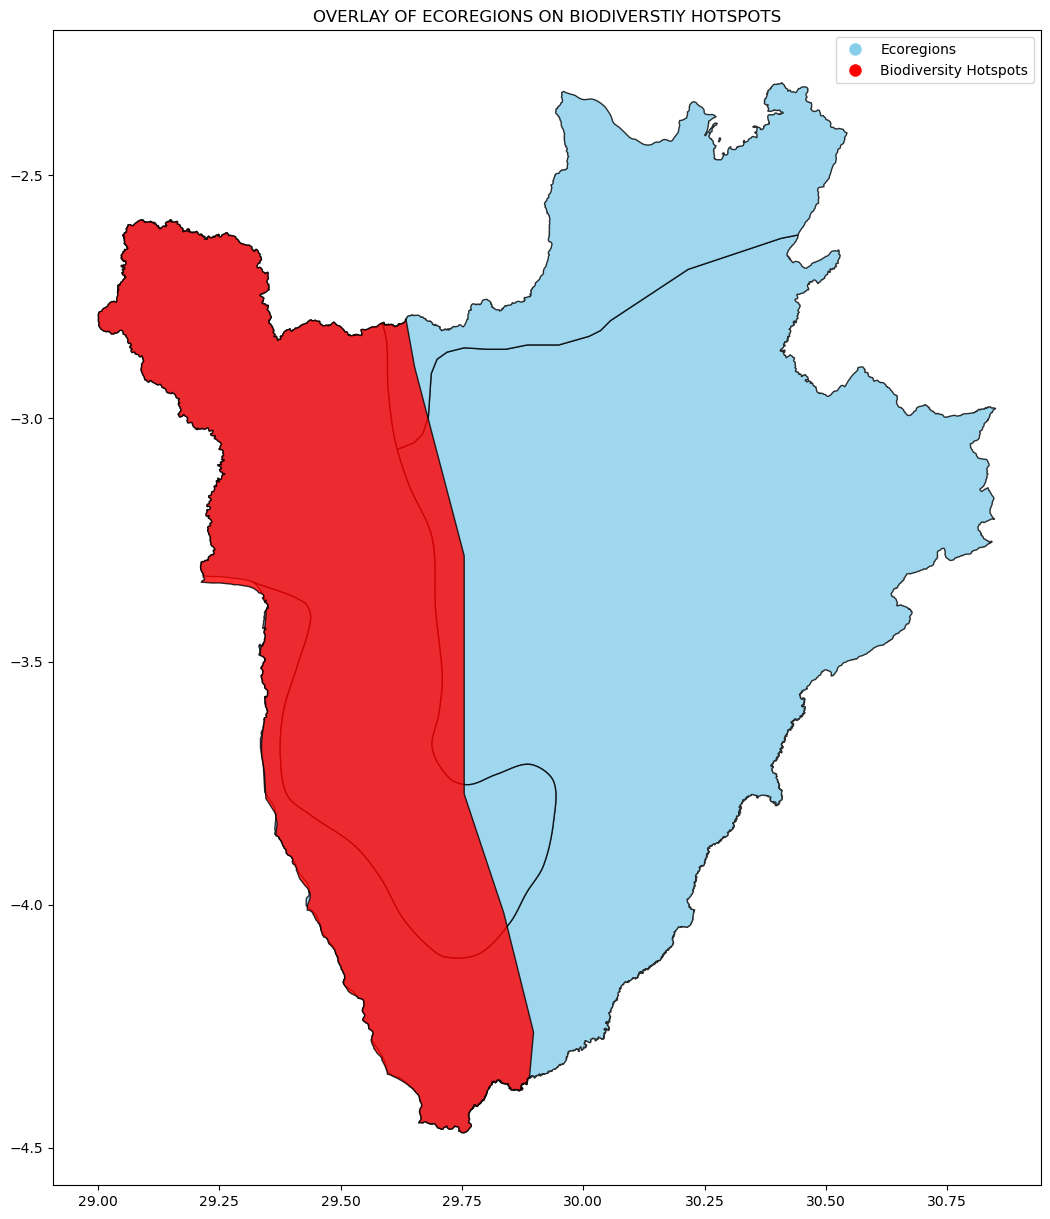

In [116]:
# Create subplot with one panel
fig, ax = plt.subplots(1, figsize=(20, 15))

# Plot ecoregions in panel 1
ecoregion_plot = ctry_ecoregion.plot(ax=ax, color="skyblue", edgecolor="black", alpha=0.8)

# Plot biodiversity hotspots on the same panel
biohotspots_plot = ctry_biohotspots.plot(ax=ax, color="red", edgecolor="black", alpha=0.8)

# Set title
plt.title("OVERLAY OF ECOREGIONS ON BIODIVERSTIY HOTSPOTS")

# Create legend handles and labels
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Ecoregions'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Biodiversity Hotspots')]

# Add legend
ax.legend(handles=handles)

# Display the plot
plt.show()


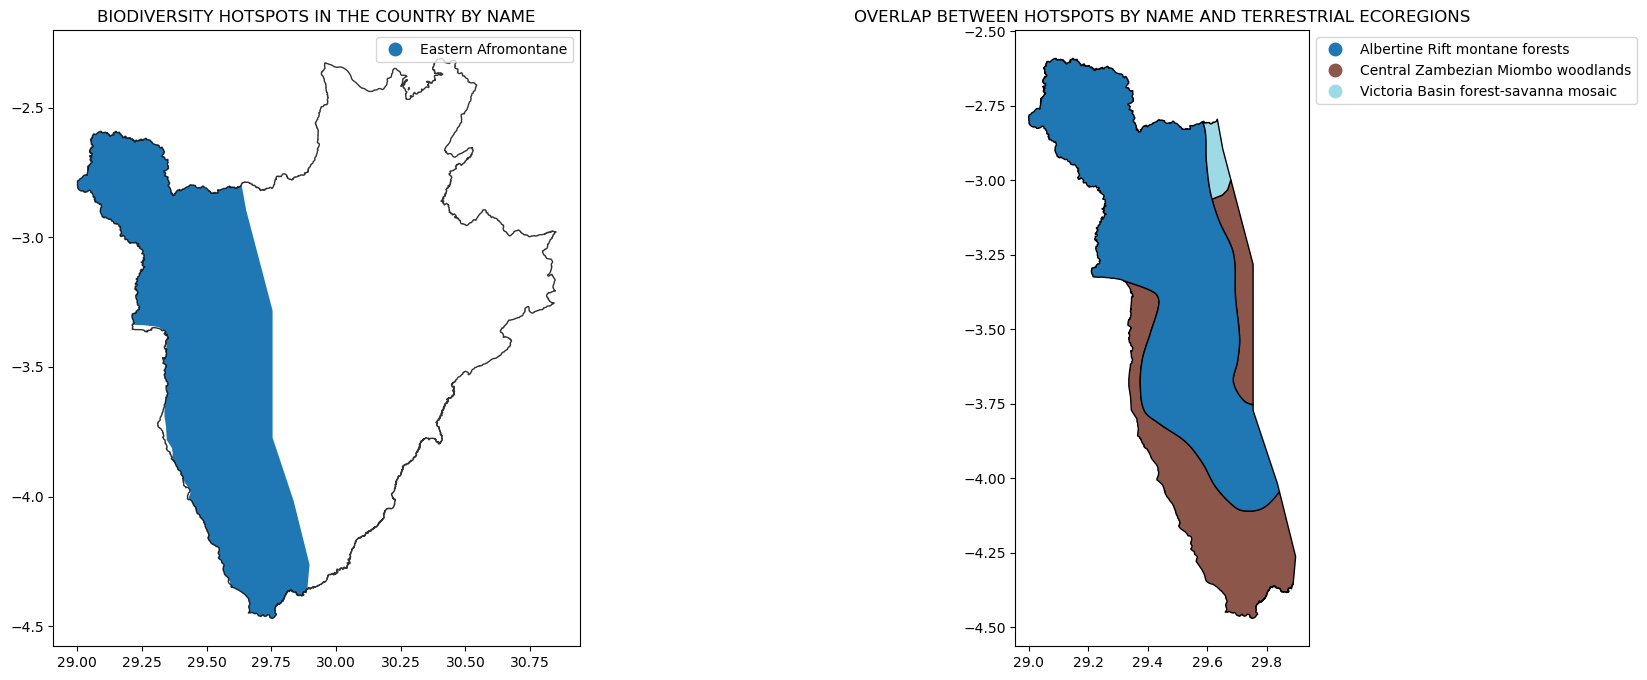

In [117]:
# Further investigate the intersection between biodiversity hotspots and different ecoregions.

from geopandas.tools import overlay

# Perform a spatial overlay between biodiversity hotspots and ecoregions
overlap = overlay(ctry_biohotspots, ctry_ecoregion, how="intersection")

# Create a subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot the biodiversity hotspots by name in panel 1
ctry_biohotspots.plot(column="NAME", cmap="tab20", ax=ax1, legend=True)
admin.plot(ax=ax1, color="none", edgecolor="black", alpha=0.8)
ax1.set_title("BIODIVERSITY HOTSPOTS IN THE COUNTRY BY NAME")

# Plot the overlapping areas between hotspots by name and ecoregions in panel 2
overlap.plot(ax=ax2, cmap="tab20", column="ECO_NAME", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax2.set_title("OVERLAP BETWEEN HOTSPOTS BY NAME AND TERRESTRIAL ECOREGIONS")

# Display the plot
plt.show()

**Observation**

The provided maps offer a visual representation of the intersection between ecoregions and biodiversity hotspots in Burundi. The first map illustrates the overlap of both ecoregions and biodiversity hotspots on the same map, while the second map (second plot) delineates the specific areas where the biodiversity hotspot intersect with ecoregions. 

Interestingly, it is observed that all three terrestrial ecoregions in Burundi are situated within the only biodiversity hotspot present in the country. This observation highlights the importance of this particular area for conservation efforts and biodiversity management.

     OVERLAY OF STATES ON BIODIVERSITY HOTSPOTS

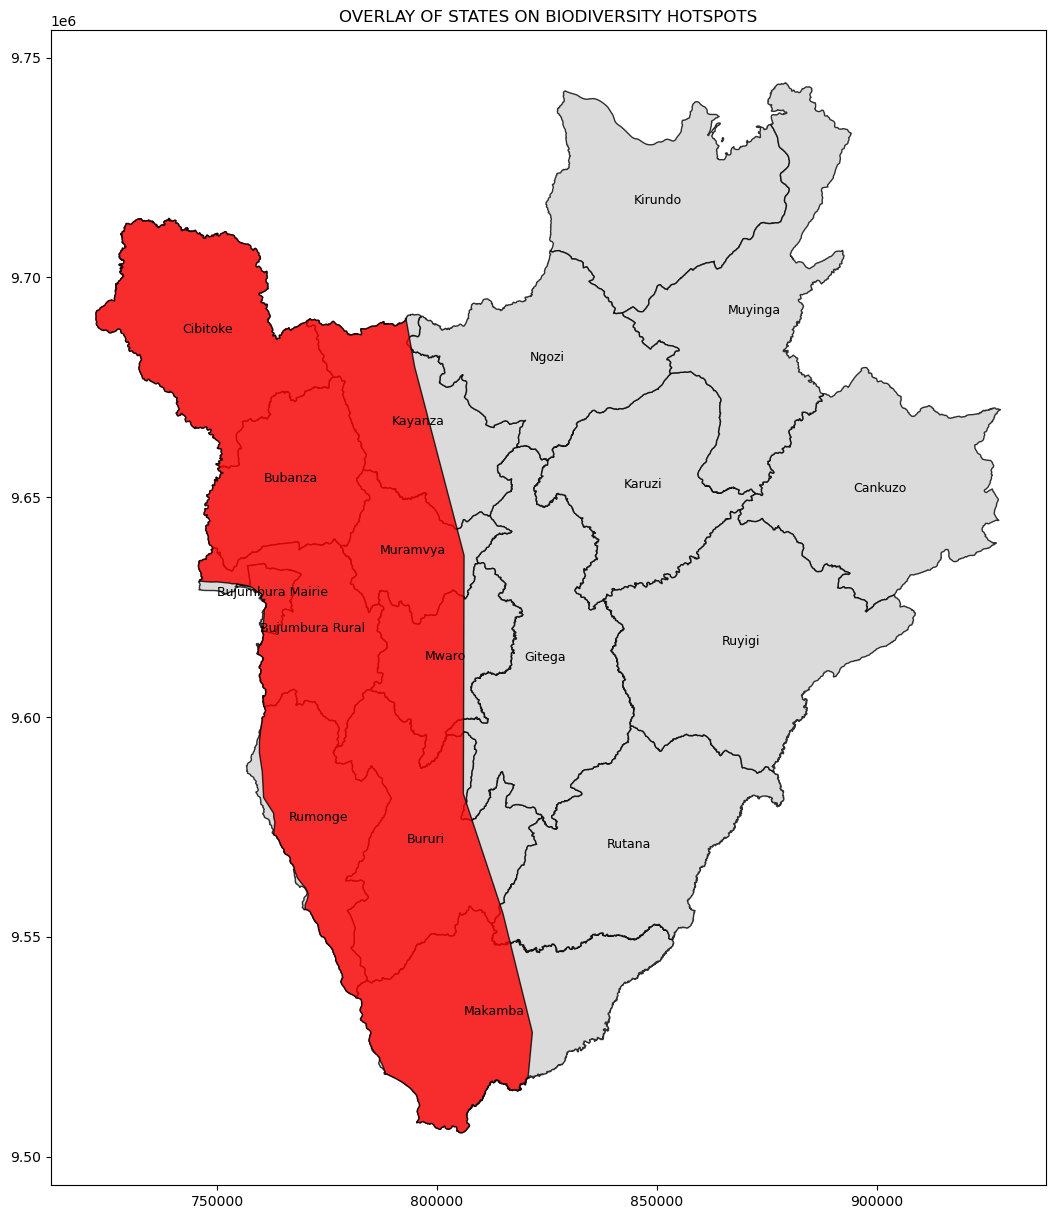

In [118]:
# Reproject geometries to a projected CRS
adminstates = adminstates.to_crs(projected_crs)
ctry_biohotspots = ctry_biohotspots.to_crs(projected_crs)

# Create subplot with one panel
fig, ax = plt.subplots(figsize=(20, 15))

# Plot ecoregions and biodiversity hotspots on the same panel
adminstates.plot(ax=ax, color="lightgrey", edgecolor="black", alpha=0.8, label="States")
ctry_biohotspots.plot(ax=ax, color="red", edgecolor="black", alpha=0.8, label="Biodiversity Hotspots")

# Annotate with state names
for x, y, label in zip(adminstates.geometry.centroid.x, adminstates.geometry.centroid.y, adminstates["name"]):
    ax.text(x, y, label, fontsize=9, ha="center", va="center", color="black")

plt.title("OVERLAY OF STATES ON BIODIVERSITY HOTSPOTS")

# Display the plot
plt.show()

In [119]:
# Reproject geometries to original CRS for arm_biodiversityhotspots
original_crs = "EPSG:4326"
ctry_biohotspots = ctry_biohotspots.to_crs(original_crs)

# Reproject geometries to original CRS for armstates_admin
adminstates = adminstates.to_crs(original_crs)

    4.5 BIOCLIMATIC AND ECOLOGICAL OVERVIEW

**Overview**

Burundi, nestled in the heart of Africa, boasts diverse ecological landscapes and environmental features that contribute to its rich natural heritage. The country is home to the Eastern Afromontane biodiversity hotspot, renowned for its unique ecosystems and endemic species. This hotspot encompasses a variety of habitats, including montane forests, grasslands, and wetlands, harboring a high level of biodiversity found nowhere else on the planet. The presence of the Eastern Afromontane hotspot emphasizes the importance of conservation efforts in Burundi to safeguard its ecological treasures and preserve its biodiversity.

In terms of agroecological zones, Burundi stands out with the Boreal-Arid zone dominating the landscape, both in geographical coverage and frequency. This observation suggests that a significant portion of Burundi's terrain exhibits environmental conditions characteristic of the Boreal-Arid zone. The prevalence of this zone has implications for agriculture, land use planning, and natural resource management, emphasizing the need for informed decision-making and sustainable development practices.

Burundi also showcases three distinct Holdridge life zones, with the Subtropical Moist Forest being the most prevalent, followed by the Subtropical Dry Forest. However, one Holdridge life zone remains unnamed, possibly due to data entry issues or incomplete documentation. Addressing these discrepancies is crucial for accurate ecological analysis and biodiversity conservation efforts. Comprehensive identification and naming of all Holdridge life zones contribute to a deeper understanding of Burundi's ecological diversity, facilitating effective conservation strategies and land management practices.

All three terrestrial ecoregions in Burundi are situated within the Eastern Afromontane biodiversity hotspot, emphasizing the hotspot's significance for conservation efforts and biodiversity management. Understanding the spatial dynamics between ecoregions and biodiversity hotspots is vital for prioritizing conservation initiatives and implementing effective land management strategies in Burundi.

Provinces such as Rumonge, Bujumbura Rural, Bujumbura Mairie, Bubanza, Cibitoke, and a significant portion of Makamba, Mwaro, Bururi, Muramvya, and Kayanza contribute to the country's ecological diversity and hold potential for conservation and sustainable development initiatives.

#### 5. SOIL

    5.0 SOIL RESOURCES

In [127]:
# Read geojson file into a geodataframe
soil = geo_data["soil"]

In [128]:
soil.head(2)

country ISO3166_2     name SNAME  mg_code       IPCC  adminlevel  \
0     BDI            Burundi    AC       23    Acrisol           2   
1     BDI            Burundi    FR       26  Ferralsol           2   

                                            geometry  
0  POLYGON ((30.64256 -2.95143, 30.64175 -2.95130...  
1  MULTIPOLYGON (((30.28191 -2.42298, 30.28172 -2...

    5.01 UNDERSTAND THE DATA

In [129]:
# Check no.of rows and columns for ctry's soil reosurces
soil.shape

(4, 8)

The dataframe has 4 rows and 8 columns

In [130]:
# View all column titles in the dataframe
soil.columns

Index(['country', 'ISO3166_2', 'name', 'SNAME', 'mg_code', 'IPCC',
       'adminlevel', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [131]:
# Check for unique value and their counts in the selected column
soil["IPCC"].value_counts()

Acrisol        1
Ferralsol      1
Nitisol        1
Waterbodies    1
Name: IPCC, dtype: int64

This shows the unique values and respective counts in the "IPCC" column.

In [132]:
# Check the data-type of each column
soil.dtypes

country         object
ISO3166_2       object
name            object
SNAME           object
mg_code          int64
IPCC            object
adminlevel       int64
geometry      geometry
dtype: object

The above shows the data types for each column.

In [133]:
# Check information about the dataframe
soil.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     4 non-null      object  
 1   ISO3166_2   4 non-null      object  
 2   name        4 non-null      object  
 3   SNAME       4 non-null      object  
 4   mg_code     4 non-null      int64   
 5   IPCC        4 non-null      object  
 6   adminlevel  4 non-null      int64   
 7   geometry    4 non-null      geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 388.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, whuch are represented with 'int64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [134]:
# Check the coordinate system of the dataframe
soil.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate System of the dataframe is 4326, which is the WGS 84 Coordinate System.

In [135]:
# Check the geometric type of the dataframe
soil.geom_type

0         Polygon
1    MultiPolygon
2    MultiPolygon
3    MultiPolygon
dtype: object

The records for the dataframe have polygon geometric type.

    5.02 COMPREHENSIVE ANALYSIS

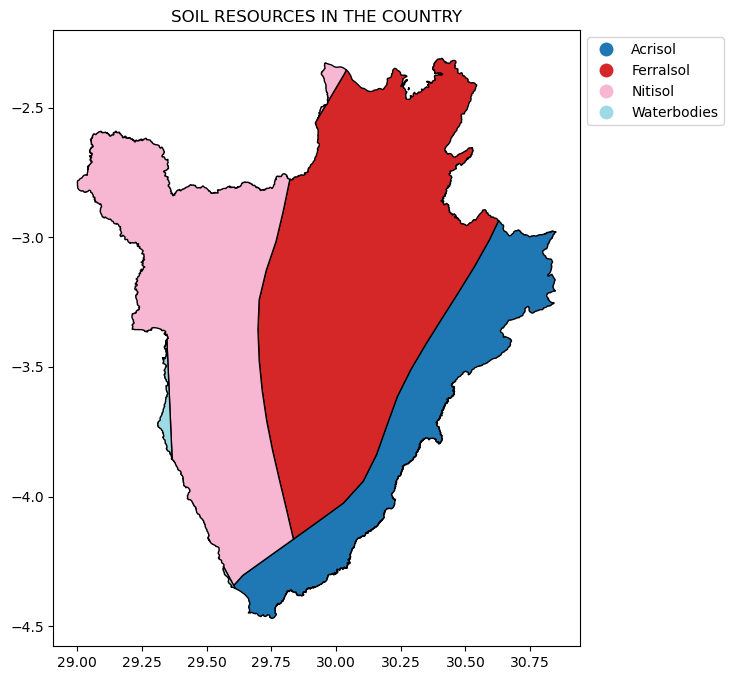

In [136]:
# Create plot for soil resources
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the ctry's soil resoucrces
soil.plot(ax=ax, cmap="tab20", column="IPCC", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("SOIL RESOURCES IN THE COUNTRY")

# Display plot
plt.show()

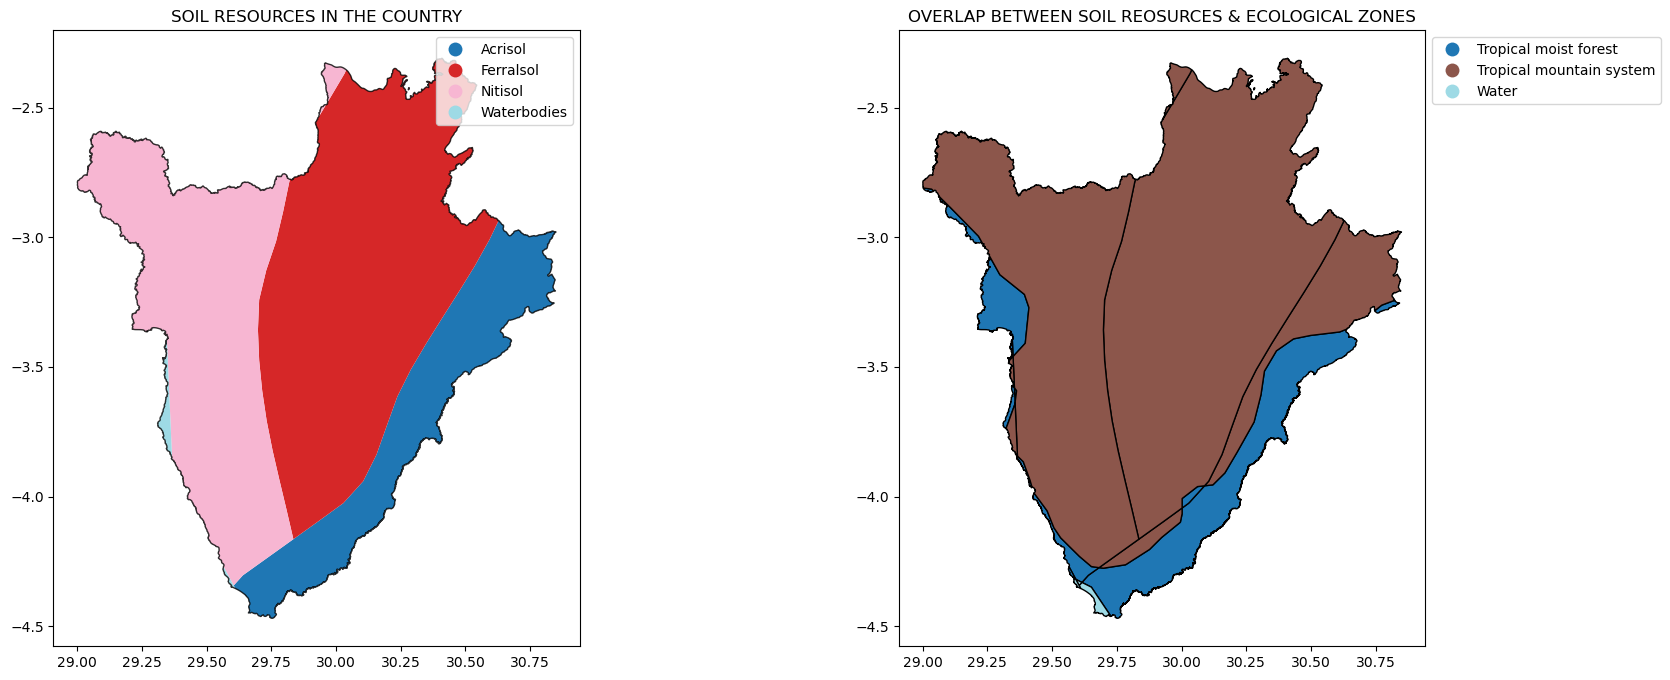

In [137]:
# Further investigate the intersection between soil resources and different terr. ecoregions.

from geopandas.tools import overlay

# Perform a spatial overlay between soil resources and terr. ecoregions
overlap = overlay(soil, gez, how="intersection", keep_geom_type=False)

# Create a subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot the soil resources in panel 1
soil.plot(column="IPCC", cmap="tab20", ax=ax1, legend=True)
admin.plot(ax=ax1, color="none", edgecolor="black", alpha=0.8)
ax1.set_title("SOIL RESOURCES IN THE COUNTRY")

# Plot the overlapping areas between soils and ecoregions in panel 2
overlap.plot(ax=ax2, cmap="tab20", column="gez_name", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax2.set_title("OVERLAP BETWEEN SOIL REOSURCES & ECOLOGICAL ZONES")

# Display the plot
plt.show()

**Observation**

The soil resource mapping conducted in Burundi provides valuable insights into the nation's diverse soil composition, highlighting three distinct soil types, alongside waterbodies at the boundaries of the country that play crucial roles in supporting various ecosystems and land uses. Among these, Ferralsol stands out as the soil resource with the broadest coverage, underscoring its prevalence and significance across Burundi's landscapes.

Furthermore, the spatial distribution of soil resources reveals interesting patterns of coexistence within specific ecological zones. For instance, within the Temperate desert, a blend of these three soil resources is evident. This co-occurrence emphasizes the intricate interplay between soil formation processes, climatic conditions, and vegetation dynamics within distinct ecological settings.

    6.1 SOIL RESOURCES OVERVIEW

**Overview**

Burundi's ecosystems are significantly influenced by three distinct soil types: Acrisol, Ferralsol, and Nitisol, each playing a vital role in the country's ecological balance and agricultural productivity. Ferralsol, the largest soil type, is characterized by its Fe/Al chemistry, contributing significantly to biomass and serving as a cornerstone for various ecosystem services. Commonly found on interior plateaus, Ferralsol supports agriculture and forestry due to its low-activity clays and unique granular microstructures.

Nitisol, the second most dominant soil type, features deep profiles and robust aggregate development, making it highly suitable for crops like coffee, citrus, and soybeans. Its contribution to agriculture enhances food security and supports sustainable farming practices. Conversely, Acrisol, the least dominant soil type, is distinguished by its clay-enriched subsoil, making it crucial for forestry and shifting cultivation. Despite its smaller prevalence, Acrisol plays a vital role in water protection and soil conservation efforts.

Moreso, Burundi's water bodies, situated along the country's boundaries, serve as essential soil resources, enriching the surrounding ecosystems with their aquatic ecosystem services. These water bodies provide crucial services such as water provision, purification, flood protection, and coastal protection. Integrating water bodies into soil resource management strategies fosters sustainable land management practices and bolsters environmental conservation and ecosystem preservation efforts across Burundi.

#### 6. CLIMATE

    6.0 CLIMATE ZONE

In [139]:
# Read geojson file into a geodataframe
wrld_climzones = geo_data["wrld_climzones"]

In [140]:
wrld_climzones.head(2)

CLASS_NAME                                           geometry
0           0  MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ...
1           0  MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ...

    7.01 UNDERSTAND THE DATA

In [141]:
# Check no.of rows and columns for world climate zones
wrld_climzones.shape

(26165, 2)

In [142]:
# Check for unique values present in the value column
wrld_climzones["CLASS_NAME"].unique()

array([ 0,  5,  6,  7,  8,  3,  4,  1,  2, 12, 11,  9, 10], dtype=int64)

In [143]:
# Fix data and replace numbers with climate zones
classification =  {"0": "Not Defined", "1" : "Warm Temperate Moist", "2" : "Warm Temperate Dry", "3" : "Cool Temperate Moist", "4" : "Cool Temperate Dry", "5" : "Polar Moist",
    "6" : "Polar Dry", "7" : "Boreal Moist", "8" : "Boreal Dry", "9" : "Tropical Montane", "10" : "Tropical Wet", "11" : "Tropical Moist", "12" : "Tropical Dry"}

In [144]:
# Rename class name
wrld_climzones.CLASS_NAME = wrld_climzones.CLASS_NAME.astype("str").replace(classification)

In [145]:
wrld_climzones.head(2)

CLASS_NAME                                           geometry
0  Not Defined  MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ...
1  Not Defined  MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ...

In [146]:
# Extract ctry's climate zones zones
ctry_climzones = wrld_climzones.clip(admin)
ctry_climzones = ctry_climzones.reset_index(drop=True)

In [147]:
ctry_climzones.head(2)

CLASS_NAME                                           geometry
0  Tropical Montane  MULTIPOLYGON (((29.65000 -4.15000, 29.70000 -4...
1  Tropical Montane  POLYGON ((29.50000 -3.90000, 29.40000 -3.90000...

In [148]:
# Check no.of rows and columns for ctry's climate zones
ctry_climzones.shape

(11, 2)

In [149]:
# View all column titles in the dataframe
ctry_climzones.columns

Index(['CLASS_NAME', 'geometry'], dtype='object')

The above shows the names of the columns.

In [150]:
# Check for unique value and their counts in the selected column
ctry_climzones["CLASS_NAME"].value_counts()

Tropical Montane        3
Tropical Moist          3
Warm Temperate Moist    2
Warm Temperate Dry      2
Tropical Dry            1
Name: CLASS_NAME, dtype: int64

This shows the unique values and respective counts in the "CLASS_NAME" column.

In [151]:
# Check the data-type of each column
ctry_climzones.dtypes

CLASS_NAME      object
geometry      geometry
dtype: object

The above shows the data types for each column.

In [152]:
# Check information about the dataframe
ctry_climzones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CLASS_NAME  11 non-null     object  
 1   geometry    11 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 308.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [153]:
# Check the coordinate system of the dataframe
ctry_climzones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate System of the dataframe is 4326, which is the WGS 84 Coordinate System.

In [154]:
# Check the geometric type of the dataframe
ctry_climzones.geom_type

0     MultiPolygon
1          Polygon
2          Polygon
3          Polygon
4          Polygon
5     MultiPolygon
6          Polygon
7          Polygon
8          Polygon
9     MultiPolygon
10    MultiPolygon
dtype: object

The records for the dataframe have polygon and multipolygon geometric type.

    6.02 COMPREHENSIVE ANALYSIS

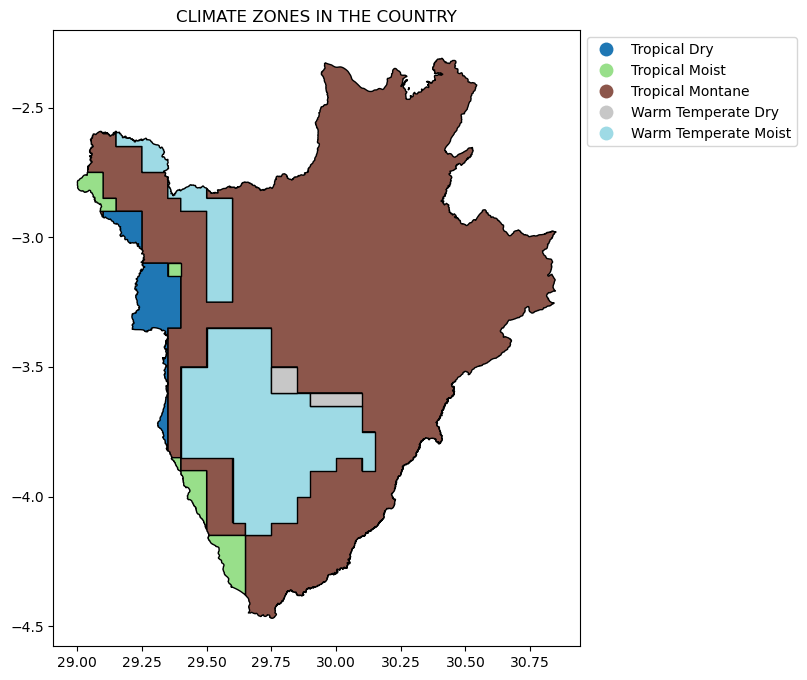

In [155]:
# Create plot for soil resources
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the Arm's soil resoucrces
ctry_climzones.plot(ax=ax, cmap="tab20", column="CLASS_NAME", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("CLIMATE ZONES IN THE COUNTRY")

# Display plot
plt.show()

In [156]:
# Re-project geometries to a projected CRS
ctry_climzones = ctry_climzones.to_crs(projected_crs)

#Calculate and print the area for each geometry 
ctry_climzones["area"] = ctry_climzones.geometry.area

In [157]:
ctry_climzones.head(2)

CLASS_NAME                                           geometry  \
0  Tropical Montane  MULTIPOLYGON (((794215.154 9540799.611, 799770...   
1  Tropical Montane  POLYGON ((777635.384 9568513.969, 766523.351 9...   

           area  
0  1.821963e+10  
1  4.596792e+08

In [158]:
# Create interactive map of the climate zones in Armenia
ctry_climzones.explore()

**Observation**

In Burundi exhibits a notable prevalence of the Tropical Montane climate zone, which stands out as both the most frequently occurring and geographically widespread climate zone across the country. This diverse climatic pattern, ranging from dry to moist temperate climates, significantly influences the ecological landscape of Burundi and profoundly impacts agricultural activities and land use practices.

The prevalence of the Tropical Montane climate zone emphasizes the importance of understanding the variability in climatic conditions within Burundi. These variations not only shape the distribution of vegetation and wildlife but also influence agricultural productivity and water resource management strategies. Additionally, the diverse climatic zones contribute to the resilience and adaptability of local ecosystems to environmental changes, highlighting the need for sustainable land management practices and climate-resilient agricultural techniques in Burundi.

    6.1 KOPPEN-GIEGER CLIMATE CHANGES (1901 -2100)

    6.11 LOAD DATASETS

In [159]:
# Access world climate shifts from 1901 -2100 from local computer using file paths and assign to a variable
climateshift_25 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\1901-1925.geojson")
climateshift_50 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\1926-1950.geojson")
climateshift_75 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\1951-1975.geojson")
climateshift_00 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\1976-2000.geojson")
climateshift_A125 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2001-2025-A1FI.geojson")
climateshift_A225 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2001-2025-A2.geojson")
climateshift_B125 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2001-2025-B1.geojson")
climateshift_B225 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2001-2025-B2.geojson")
climateshift_A150 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2026-2050-A1FI.geojson")
climateshift_A250 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2026-2050-A2.geojson")
climateshift_B150 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2026-2050-B1.geojson")
climateshift_B250 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2026-2050-B2.geojson")
climateshift_A175 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2051-2075-A1FI.geojson")
climateshift_A275 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2051-2075-A2.geojson")
climateshift_B175 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2051-2075-B1.geojson")
climateshift_B275 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2051-2075-B2.geojson")
climateshift_A1100 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2076-2100-A1FI.geojson")
climateshift_A2100 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2076-2100-A2.geojson")
climateshift_B1100 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2076-2100-B1.geojson")
climateshift_B2100 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2076-2100-B2.geojson")

In [160]:
# Read geojson files into  geodataframe
shift_25 = gpd.read_file(climateshift_25)
shift_50 = gpd.read_file(climateshift_50)
shift_75 = gpd.read_file(climateshift_75)
shift_00 = gpd.read_file(climateshift_00)
shift_A125 = gpd.read_file(climateshift_A125)
shift_A225 = gpd.read_file(climateshift_A225)
shift_B125 = gpd.read_file(climateshift_B125)
shift_B225 = gpd.read_file(climateshift_B225)
shift_A150 = gpd.read_file(climateshift_A150)
shift_A250 = gpd.read_file(climateshift_A250)
shift_B150 = gpd.read_file(climateshift_B150)
shift_B250 = gpd.read_file(climateshift_B250)
shift_A175 = gpd.read_file(climateshift_A175)
shift_A275 = gpd.read_file(climateshift_A275)
shift_B175 = gpd.read_file(climateshift_B175)
shift_B275 = gpd.read_file(climateshift_B275)
shift_A1100 = gpd.read_file(climateshift_A1100)
shift_A2100 = gpd.read_file(climateshift_A2100)
shift_B1100 = gpd.read_file(climateshift_B1100)
shift_B2100 = gpd.read_file(climateshift_B2100)

In [161]:
# Check for the top two rows using any of the dataframes
shift_50.head(2)

OBJECTID  ID  GRIDCODE  Shape_Length  Shape_Area  \
0         1   1        62           2.0        0.25   
1         2   2        62           5.0        1.00   

                                            geometry  
0  POLYGON ((-37.50000 83.50000, -37.50000 84.000...  
1  POLYGON ((-46.00000 83.00000, -44.00000 83.000...

    6.12 UNDERSTAND THE DATA

In [162]:
# understand the data using one of the dataframes

# Check no.of rows and columns for any dataframe
shift_25.shape

(2319, 6)

The dataframe has 2319 rows and 6 columns.

In [163]:
# Check for unique values present in the value column
shift_25["GRIDCODE"].unique()

array([62, 61, 44, 52, 43, 47, 51, 48, 33, 42, 32, 46, 50, 26, 35, 36, 41,
       31, 45, 34, 21, 49, 38, 37, 22, 27, 39, 14, 12, 13, 11],
      dtype=int64)

In [164]:
# Check for unique values present in the value column in another dataframe
shift_A225["GRIDCODE"].unique()

array([62., 61., 44., 47., 43., 51., 33., 52., 32., 42., 26., 50., 41.,
       35., 46., 49., 21., 31., 45., 34., 27., 22., 37., 36., 38., 39.,
       12., 14., 13., 11., nan])

Both dataframes contan different datatypes in the 'GRIDCODE' column

In [165]:
# Iterate through dataframes and update GRIDCODE column to integers

# List of dataframes to iterate through
dataframes = [shift_25, shift_50, shift_75, shift_00, 
              shift_A125, shift_A225, shift_B125, shift_B225, 
              shift_A150, shift_A250, shift_B150, shift_B250, 
              shift_A175, shift_A275, shift_B175, shift_B275, 
              shift_A1100, shift_A2100, shift_B1100, shift_B2100]

# Iterate through dataframes
for df in dataframes:
    # Check for non-finite values and replace them with a default value. In this case, 0
    df["GRIDCODE"] = df["GRIDCODE"].replace([np.inf, -np.inf, np.nan], 0)
    
    # Convert the GRIDCODE column to integers
    df["GRIDCODE"] = df["GRIDCODE"].astype(int)


In [166]:
# Fix data and replace numbers with climate classes using the Koppen-Geiger system
koppen_abb = {"11": "Af", "12": "Am", "13": "As", "14": "Aw", "21": "BWk", "22": "BWh", "26": "BSk", "27": "BSh", "31": "Cfa", 
              "32": "Cfb", "33": "Cfc", "34": "Csa", "35": "Csb", "36": "Csc", "37": "Cwa", "38": "Cwb", "39": "Cwc", "41": "Dfa", 
              "42": "Dfb", "43": "Dfc", "44": "Dfd", "45": "Dsa", "46": "Dsb", "47": "Dsc", "48": "Dsd", "49": "Dwa", "50": "Dwb", 
              "51": "Dwc", "52": "Dwd", "61": "EF", "62": "ET"}


In [167]:
# Rename class name for all dataframes
shift_25.GRIDCODE = shift_25.GRIDCODE.astype("str").replace(koppen_abb)
shift_50.GRIDCODE = shift_50.GRIDCODE.astype("str").replace(koppen_abb)
shift_75.GRIDCODE = shift_75.GRIDCODE.astype("str").replace(koppen_abb)
shift_00.GRIDCODE = shift_00.GRIDCODE.astype("str").replace(koppen_abb)
shift_A125.GRIDCODE = shift_A125.GRIDCODE.astype("str").replace(koppen_abb)
shift_A225.GRIDCODE = shift_A225.GRIDCODE.astype("str").replace(koppen_abb)
shift_B125.GRIDCODE = shift_B125.GRIDCODE.astype("str").replace(koppen_abb)
shift_B225.GRIDCODE = shift_B225.GRIDCODE.astype("str").replace(koppen_abb)
shift_A150.GRIDCODE = shift_A150.GRIDCODE.astype("str").replace(koppen_abb)
shift_A250.GRIDCODE = shift_A250.GRIDCODE.astype("str").replace(koppen_abb)
shift_B150.GRIDCODE = shift_B150.GRIDCODE.astype("str").replace(koppen_abb)
shift_B250.GRIDCODE = shift_B250.GRIDCODE.astype("str").replace(koppen_abb)
shift_A175.GRIDCODE = shift_A175.GRIDCODE.astype("str").replace(koppen_abb)
shift_A275.GRIDCODE = shift_A275.GRIDCODE.astype("str").replace(koppen_abb)
shift_B175.GRIDCODE = shift_B175.GRIDCODE.astype("str").replace(koppen_abb)
shift_B275.GRIDCODE = shift_B275.GRIDCODE.astype("str").replace(koppen_abb)
shift_A1100.GRIDCODE = shift_A1100.GRIDCODE.astype("str").replace(koppen_abb)
shift_A2100.GRIDCODE = shift_A2100.GRIDCODE.astype("str").replace(koppen_abb)
shift_B1100.GRIDCODE = shift_B1100.GRIDCODE.astype("str").replace(koppen_abb)
shift_B2100.GRIDCODE = shift_B2100.GRIDCODE.astype("str").replace(koppen_abb)

In [168]:
# Define mappings for abbreviated climate classes
koppen_term = {
    "Af": "Tropical rainforest climate", "Am": "Tropical monsoon climate",
    "As": "Tropical savanna climate with dry-summer characteristics",
    "Aw": "Tropical savanna climate with dry-winter characteristics",
    "BWk": "Cold desert climate", "BWh": "Hot desert climate",
    "BSk": "Cold semi-arid climate", "BSh": "Hot semi-arid climate",
    "Cfa": "Humid subtropical climate;", "Cfb": "Temperate oceanic climate",
    "Cfc": "Subpolar oceanic climate", "Csa": "Hot-summer Mediterranean climate",
    "Csb": "Warm-summer Mediterranean climate", "Csc": "Cold-summer Mediterranean climate",
    "Cwa": "Monsoon-influenced humid subtropical climate", "Cwb": "Subtropical highland climate",
    "Cwc": "Cold subtropical highland climate", "Dfa": "Hot-summer humid continental climate",
    "Dfb": "Warm-summer humid continental climate", "Dfc": "Subarctic climate",
    "Dfd": "Extremely cold subarctic climate", "Dsa": "Mediterranean-influenced hot-summer humid continental climate",
    "Dsb": "Mediterranean-influenced warm-summer humid continental climate",
    "Dsc": "Mediterranean-influenced subarctic climate", "Dsd": "Mediterranean-influenced extremely cold subarctic climate",
    "Dwa": "Monsoon-influenced hot-summer humid continental climate",
    "Dwb": "Monsoon-influenced warm-summer humid continental climate",
    "Dwc": "Monsoon-influenced subarctic climate",
    "Dwd": "Monsoon-influenced extremely cold subarctic climate",
    "EF": "Ice cap climate", "ET": "Tundra climate"
}

# Iterate through dataframes and update GRIDCODE column
for df in dataframes:
    df["GRIDCODE"] = df["GRIDCODE"].astype("str").replace(koppen_abb)

# Create a new column for defined climate classes in full terms
for df in dataframes:
    df["koppen_term"] = "Unknown"
    df["koppen_term"] = df["GRIDCODE"].map(koppen_term)

In [169]:
# Check dataframe after mapping
shift_25.head(2)

OBJECTID  ID GRIDCODE  Shape_Length  Shape_Area  \
0         1   1       ET           2.0        0.25   
1         2   2       ET          16.0        3.75   

                                            geometry     koppen_term  
0  POLYGON ((-37.50000 83.50000, -37.50000 84.000...  Tundra climate  
1  POLYGON ((-29.50000 83.50000, -29.50000 84.000...  Tundra climate

In [170]:
shift_A225.head(2)

OBJECTID   ID GRIDCODE  Shape_Length  Shape_Area  \
0         1  1.0       ET      1.874914    0.160097   
1         2  2.0       ET      5.000000    1.000000   

                                            geometry     koppen_term  
0  POLYGON ((-37.50000 83.50000, -37.75000 84.140...  Tundra climate  
1  POLYGON ((-46.00000 83.00000, -44.00000 83.000...  Tundra climate

In [171]:
# Extract ctry's climate shifts
ctry_climshifts_25 = shift_25.clip(admin)
ctry_climshifts_25 = ctry_climshifts_25.reset_index(drop=True)

ctry_climshifts_50 = shift_50.clip(admin)
ctry_climshifts_50 = ctry_climshifts_50.reset_index(drop=True)

ctry_climshifts_75 = shift_75.clip(admin)
ctry_climshifts_75 = ctry_climshifts_75.reset_index(drop=True)

ctry_climshifts_00 = shift_00.clip(admin)
ctry_climshifts_00 = ctry_climshifts_00.reset_index(drop=True)

ctry_climshifts_A125 = shift_A125.clip(admin)
ctry_climshifts_A125 = ctry_climshifts_A125.reset_index(drop=True)

ctry_climshifts_A225 = shift_A225.clip(admin)
ctry_climshifts_A225 = ctry_climshifts_A225.reset_index(drop=True)

ctry_climshifts_B125 = shift_B125.clip(admin)
ctry_climshifts_B125 = ctry_climshifts_B125.reset_index(drop=True)

ctry_climshifts_B225 = shift_B225.clip(admin)
ctry_climshifts_B225 = ctry_climshifts_B225.reset_index(drop=True)

ctry_climshifts_A150 = shift_A150.clip(admin)
ctry_climshifts_A150 = ctry_climshifts_A150.reset_index(drop=True)

ctry_climshifts_A250 = shift_A250.clip(admin)
ctry_climshifts_A250 = ctry_climshifts_A250.reset_index(drop=True)

ctry_climshifts_B150 = shift_B150.clip(admin)
ctry_climshifts_B150 = ctry_climshifts_B150.reset_index(drop=True)

ctry_climshifts_B250 = shift_B250.clip(admin)
ctry_climshifts_B250 = ctry_climshifts_B250.reset_index(drop=True)

ctry_climshifts_A175 = shift_A175.clip(admin)
ctry_climshifts_A175 = ctry_climshifts_A175.reset_index(drop=True)

ctry_climshifts_A275 = shift_A275.clip(admin)
ctry_climshifts_A275 = ctry_climshifts_A275.reset_index(drop=True)

ctry_climshifts_B175 = shift_B175.clip(admin)
ctry_climshifts_B175 = ctry_climshifts_B175.reset_index(drop=True)

ctry_climshifts_B275 = shift_B275.clip(admin)
ctry_climshifts_B275 = ctry_climshifts_B275.reset_index(drop=True)

ctry_climshifts_A1100 = shift_A1100.clip(admin)
ctry_climshifts_A1100 = ctry_climshifts_A1100.reset_index(drop=True)

ctry_climshifts_A2100 = shift_A2100.clip(admin)
ctry_climshifts_A2100 = ctry_climshifts_A2100.reset_index(drop=True)

ctry_climshifts_B1100 = shift_B1100.clip(admin)
ctry_climshifts_B1100 = ctry_climshifts_B1100.reset_index(drop=True)

ctry_climshifts_B2100 = shift_B2100.clip(admin)
ctry_climshifts_B2100 = ctry_climshifts_B2100.reset_index(drop=True)

In [172]:
# Read dataframe 
ctry_climshifts_B175.head(5)

OBJECTID    ID GRIDCODE  Shape_Length  Shape_Area  \
0      1935  1935       Aw         420.0       738.5   

                                            geometry  \
0  MULTIPOLYGON (((29.00075 -2.78905, 29.00076 -2...   

                                         koppen_term  
0  Tropical savanna climate with dry-winter chara...

In [173]:
ctry_climshifts_A225.head(5)

OBJECTID      ID GRIDCODE  Shape_Length  Shape_Area  \
0      1824  1824.0       Aw    266.237792  576.608174   
1      1654  1654.0      Cwb      1.886443    0.171167   
2      1642  1642.0      Cfb      6.115950    1.661615   

                                            geometry  \
0  MULTIPOLYGON (((29.24961 -2.62228, 29.24970 -2...   
1  POLYGON ((30.00000 -4.00000, 29.39038 -3.82883...   
2  POLYGON ((29.08483 -2.87163, 29.08436 -2.87066...   

                                         koppen_term  
0  Tropical savanna climate with dry-winter chara...  
1                       Subtropical highland climate  
2                          Temperate oceanic climate

    6.13 COMPREHENSIVE ANALYSIS

    CLIMATE SHIFTS USING OBSERVATIONS FOR 1901 -2000

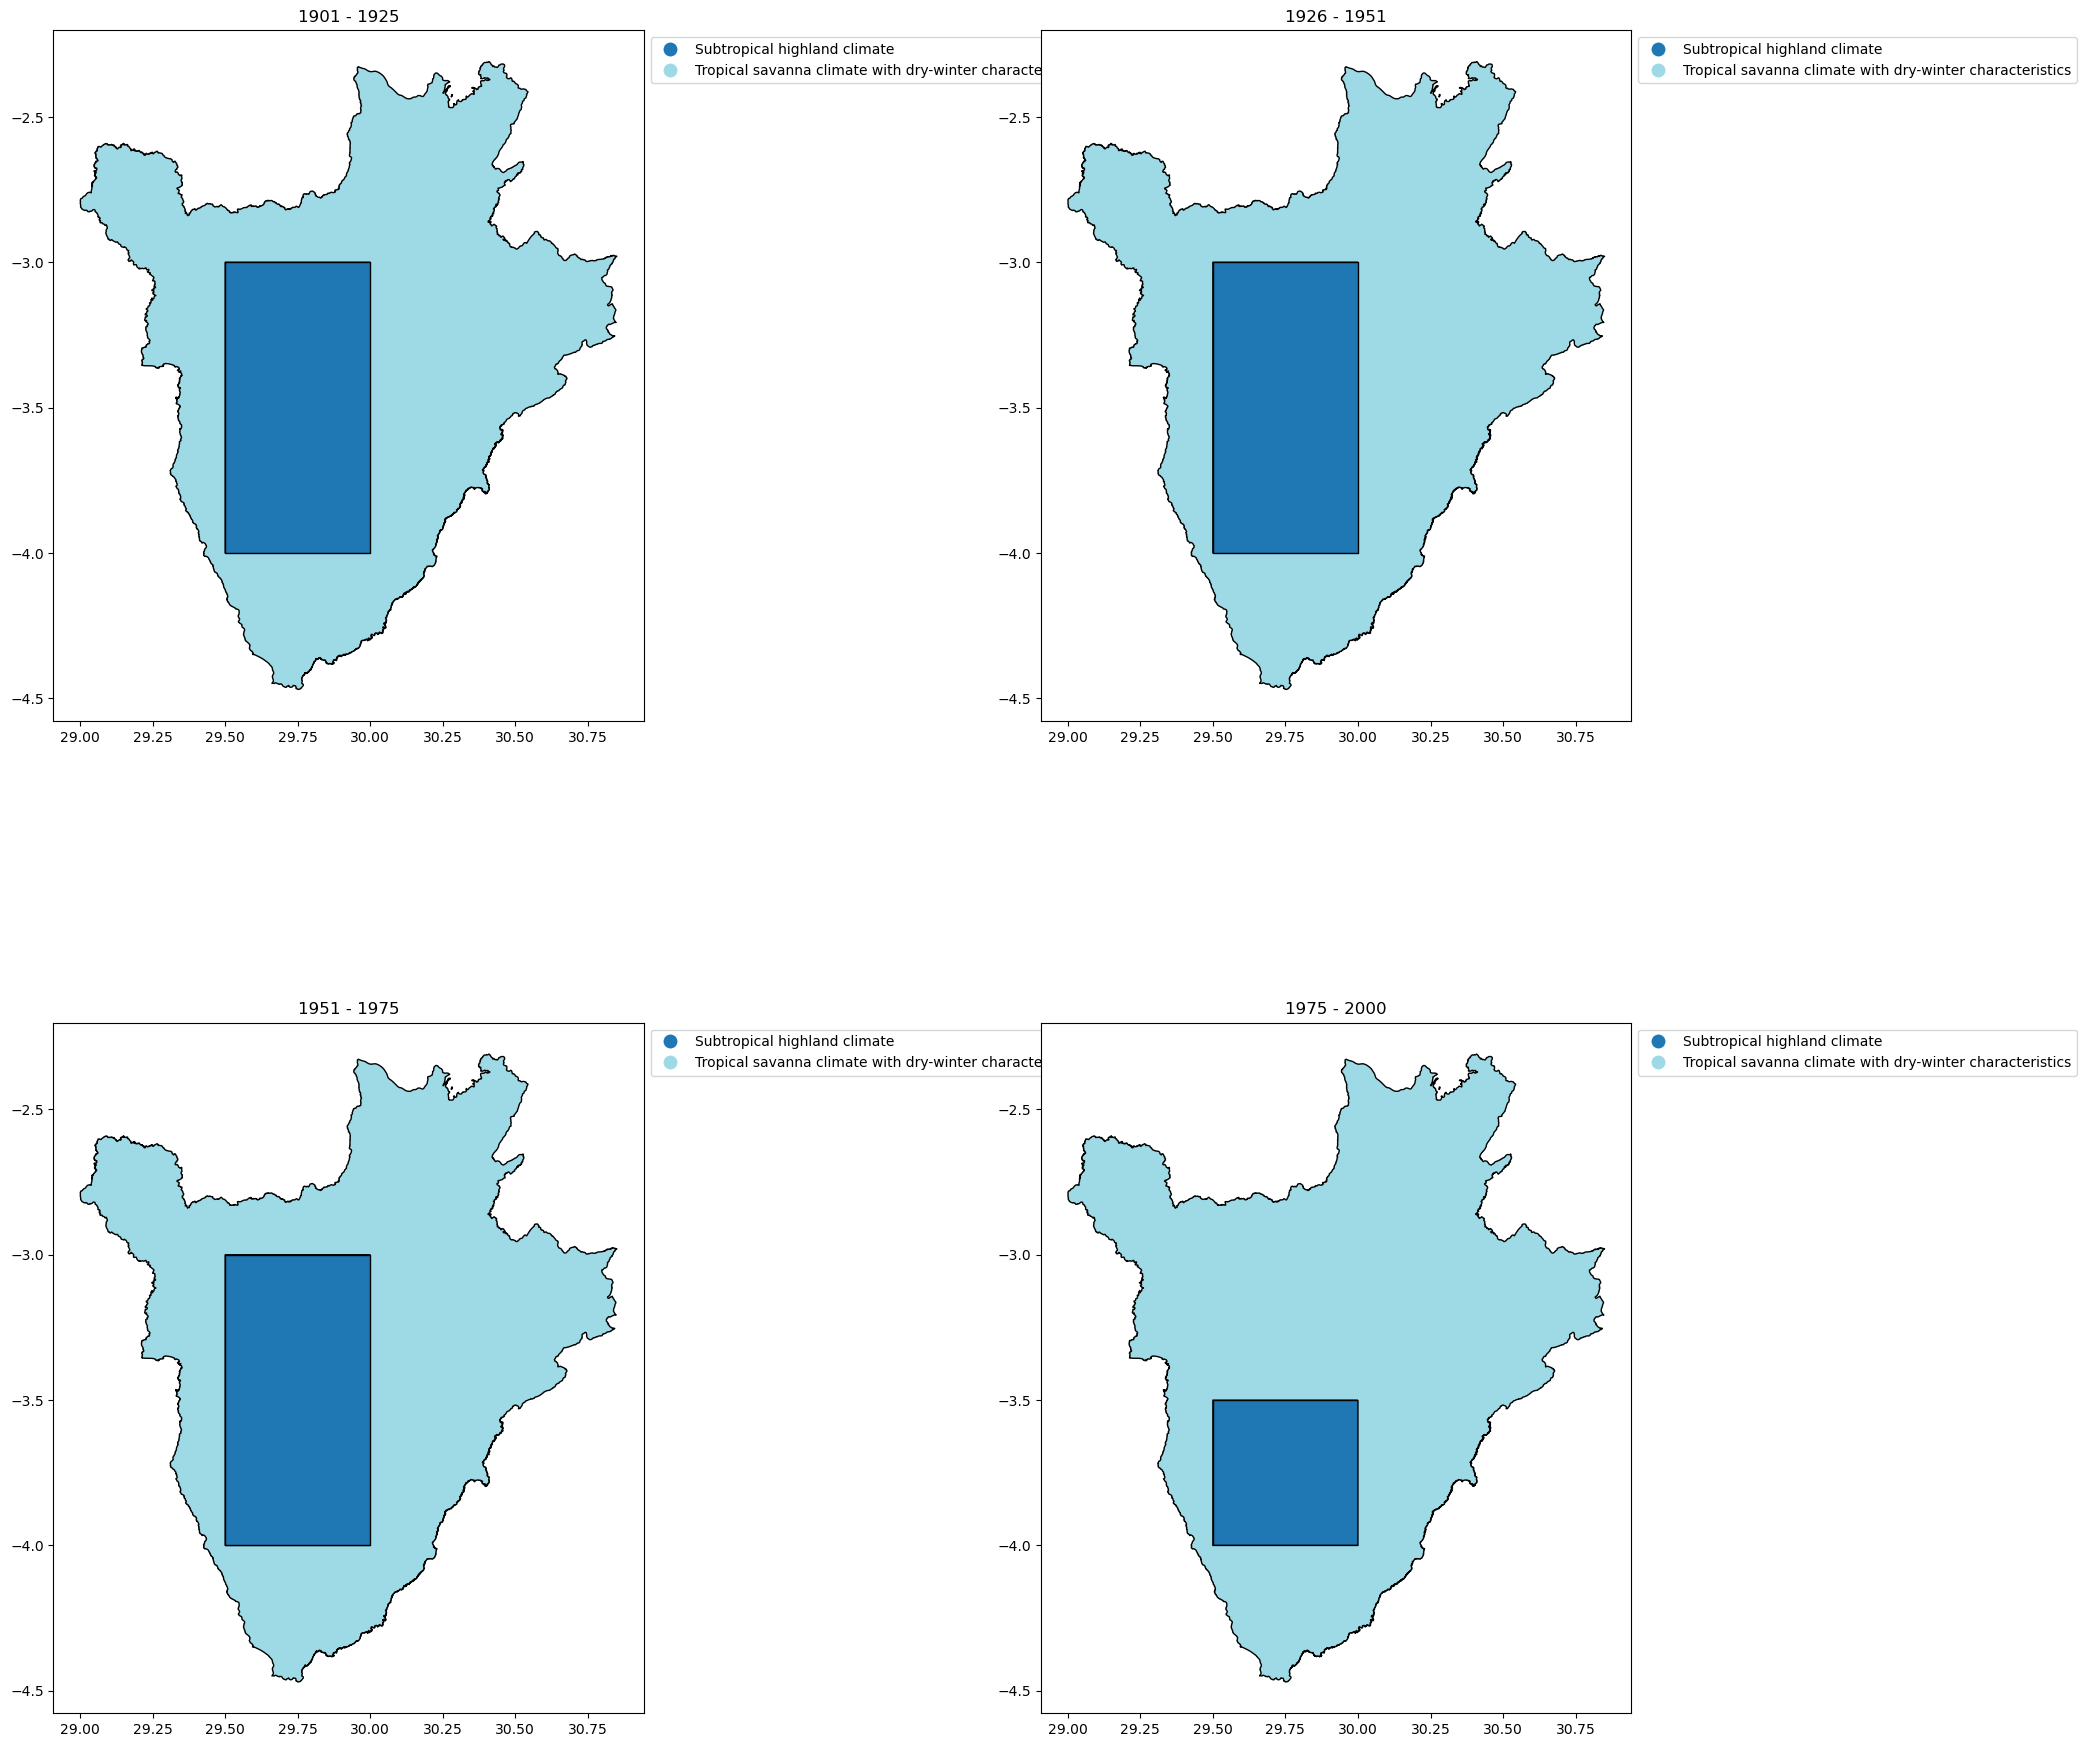

In [174]:
# Create a subplot with two panels on one row
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Plot for 1901-1925 in panel 1
ctry_climshifts_25.plot(ax=ax1, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax1.set_title("1901 - 1925")

# Plot for 1926-1950 in panel 2
ctry_climshifts_50.plot(ax=ax2, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("1926 - 1951")

# Plot for 1951-1975 in panel 3
ctry_climshifts_75.plot(ax=ax3, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax3.set_title("1951 - 1975")

# Plot for 1975-2000 in panel 4
ctry_climshifts_00.plot(ax=ax4, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax4.set_title("1975 - 2000")

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


**Observation**

Burundi's climatic profile between 1901 and 2000 featured predominantly two climate zones: the Tropical Savanna climate with dry-summer characteristics and the Subtropical Highland climate.

The Tropical Savanna climate with dry-summer characteristics maintained its dominance over almost a century, indicating its resilience and stability within Burundi's climatic context. This climate zone is characterized by distinct wet and dry seasons, with relatively high temperatures throughout the year.

In contrast, the Subtropical Highland climate, which covers significant portions of Burundi's geographic area, experienced a notable reduction in coverage around 1975, decreasing to approximately half its original size. This reduction may indicate shifts in climatic patterns or environmental factors influencing the distribution of highland climates within Burundi.

     A1F1 CLIMATE SECENARIO

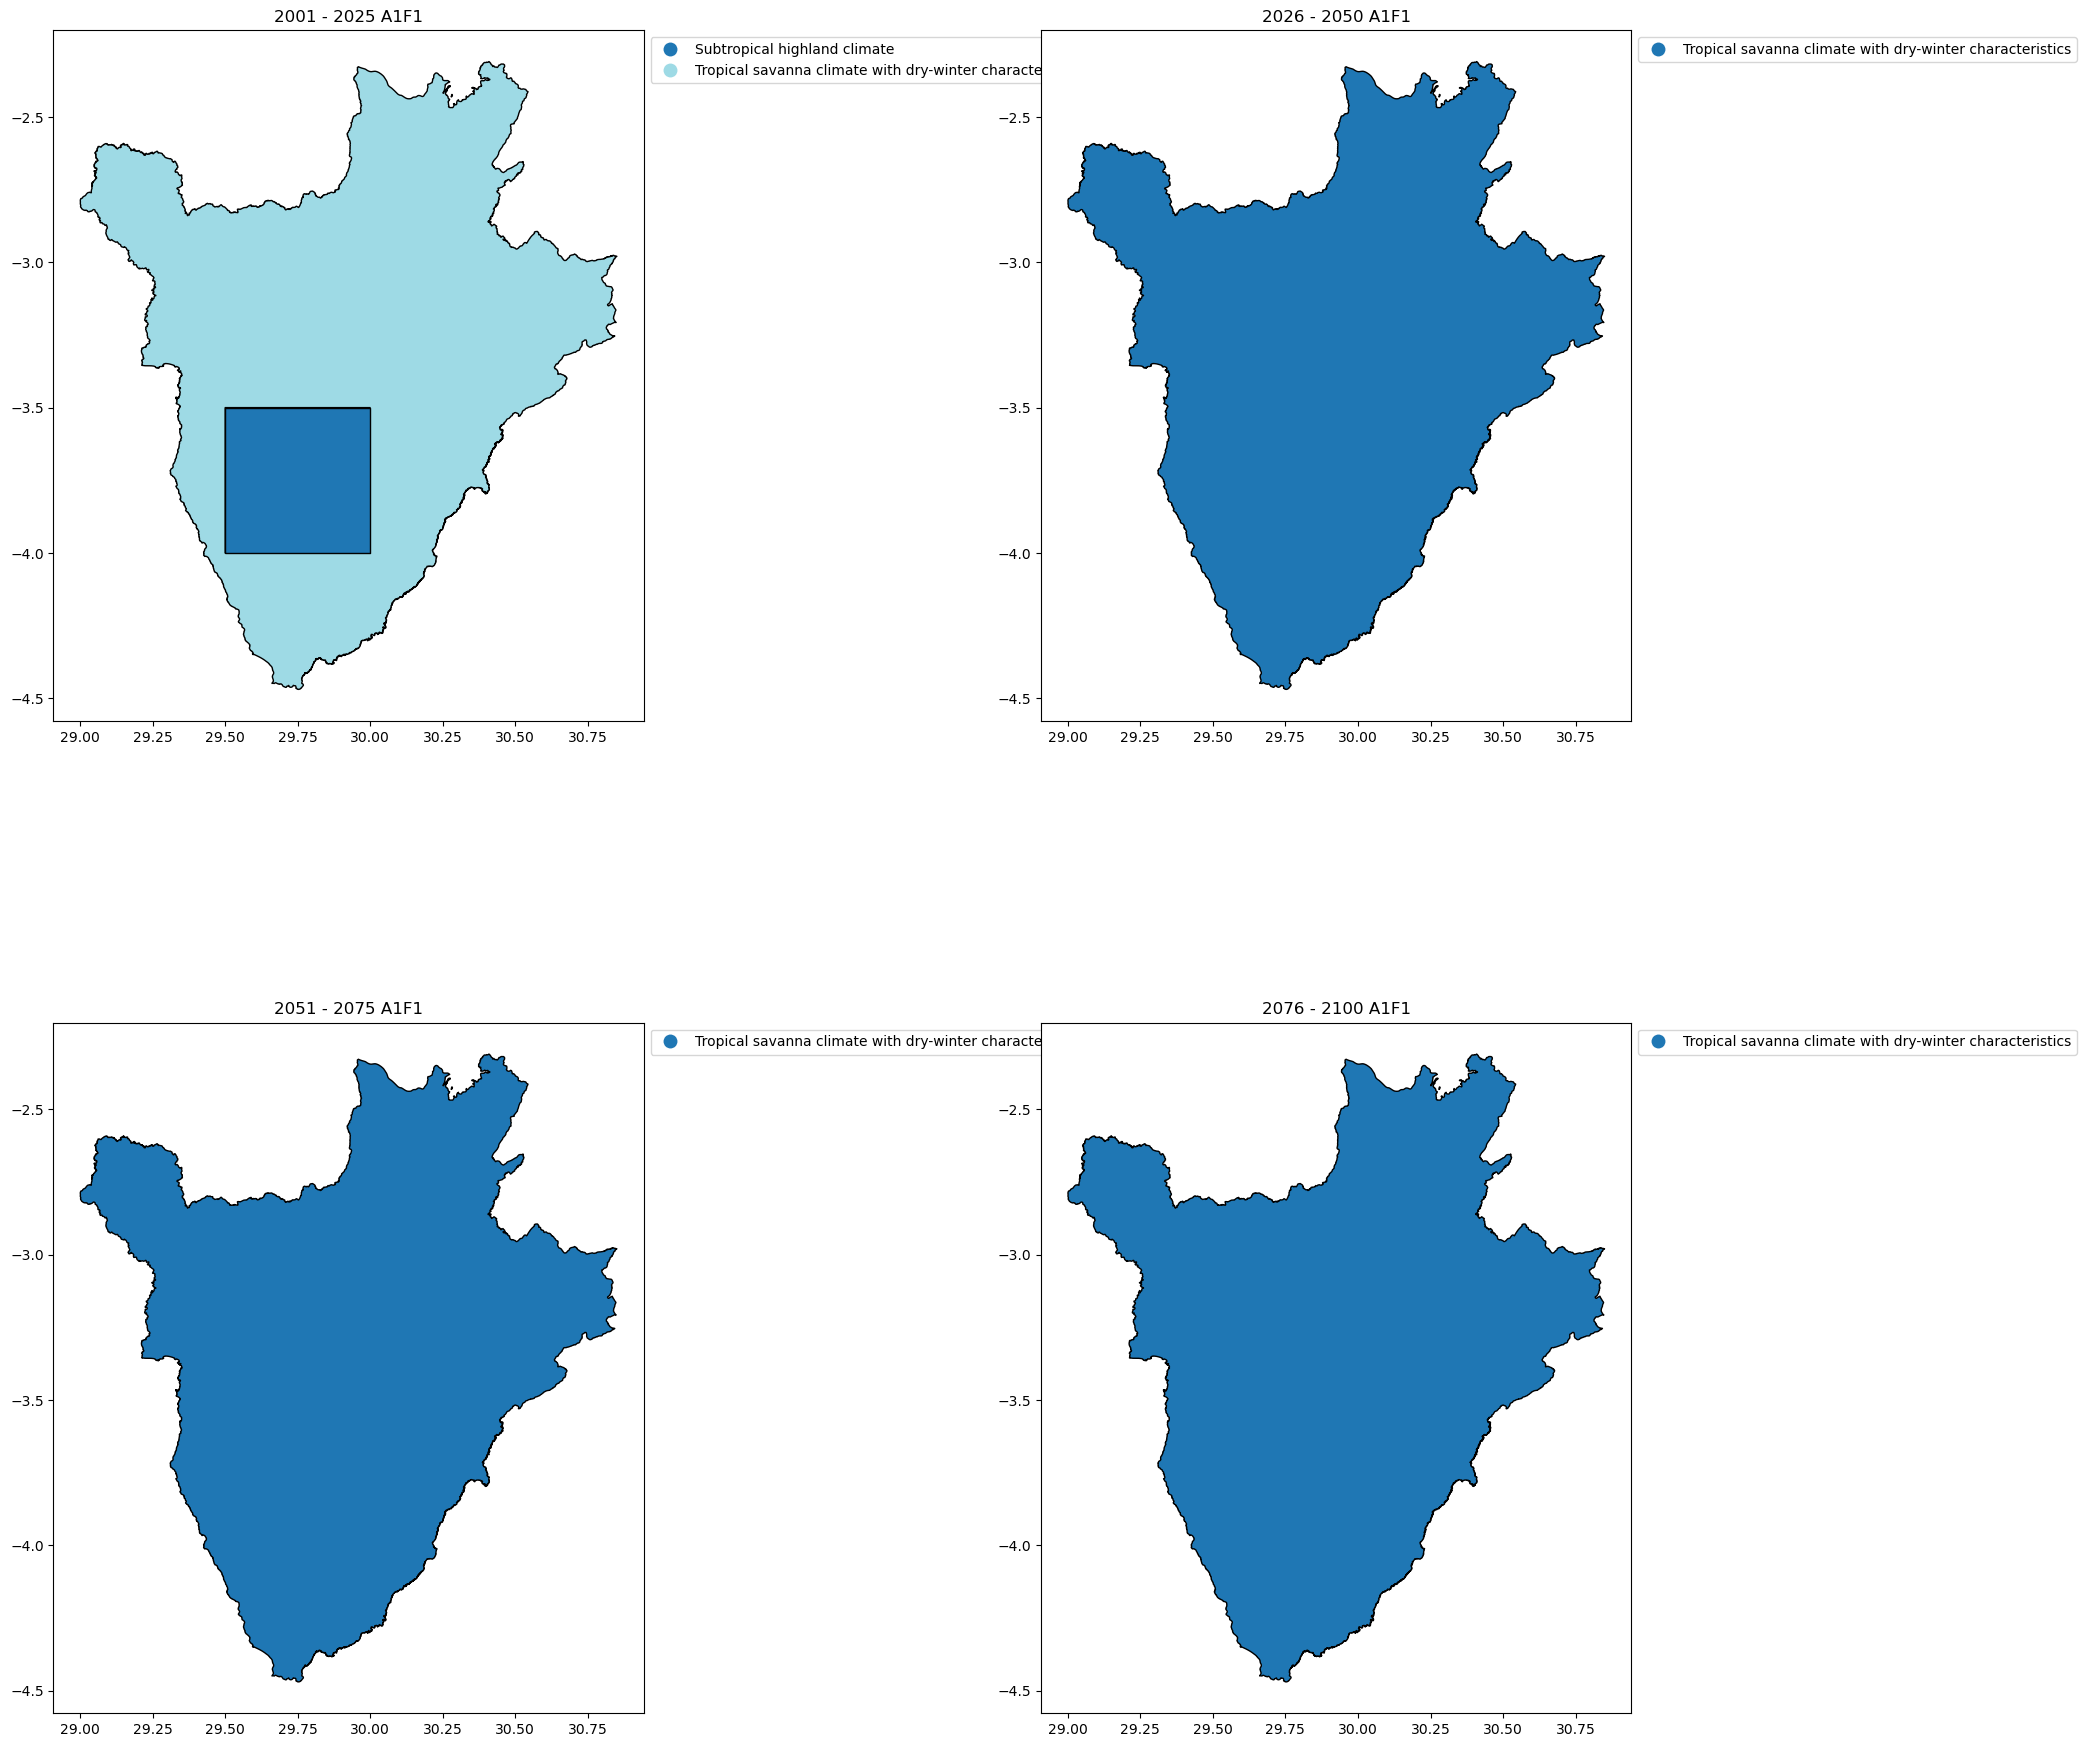

In [175]:
# Create a subplot with two panels on one row
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Plot for 2001-2025 in panel 1
ctry_climshifts_A125.plot(ax=ax1, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax1.set_title("2001 - 2025 A1F1")

# Plot for 2026-2050 in panel 2
ctry_climshifts_A150.plot(ax=ax2, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("2026 - 2050 A1F1")

# Plot for 2051-2075 in panel 3
ctry_climshifts_A175.plot(ax=ax3, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax3.set_title("2051 - 2075 A1F1")

# Plot for 2076-2100 in panel 4
ctry_climshifts_A1100.plot(ax=ax4, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax4.set_title("2076 - 2100 A1F1")

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


**Observation**

The A1F1 scenario presents concerning projections for future climate change in Burundi. Between 2001 and 2025, it indicates that the Tropical Savanna climate with dry-summer characteristics and the Subtropical Highland climate will remain the primary climates in Burundi. Among these, the Tropical Savanna climate with dry-summer characteristics is expected to be the most dominant during this period.

Looking further ahead, from 2026 to 2100, the scenario suggests a significant shift in Burundi's climate profile. It forecasts that the Tropical Savanna climate with dry-summer characteristics will become the sole climate existing in the country. 

    A2 CLIMATE SCENARIO

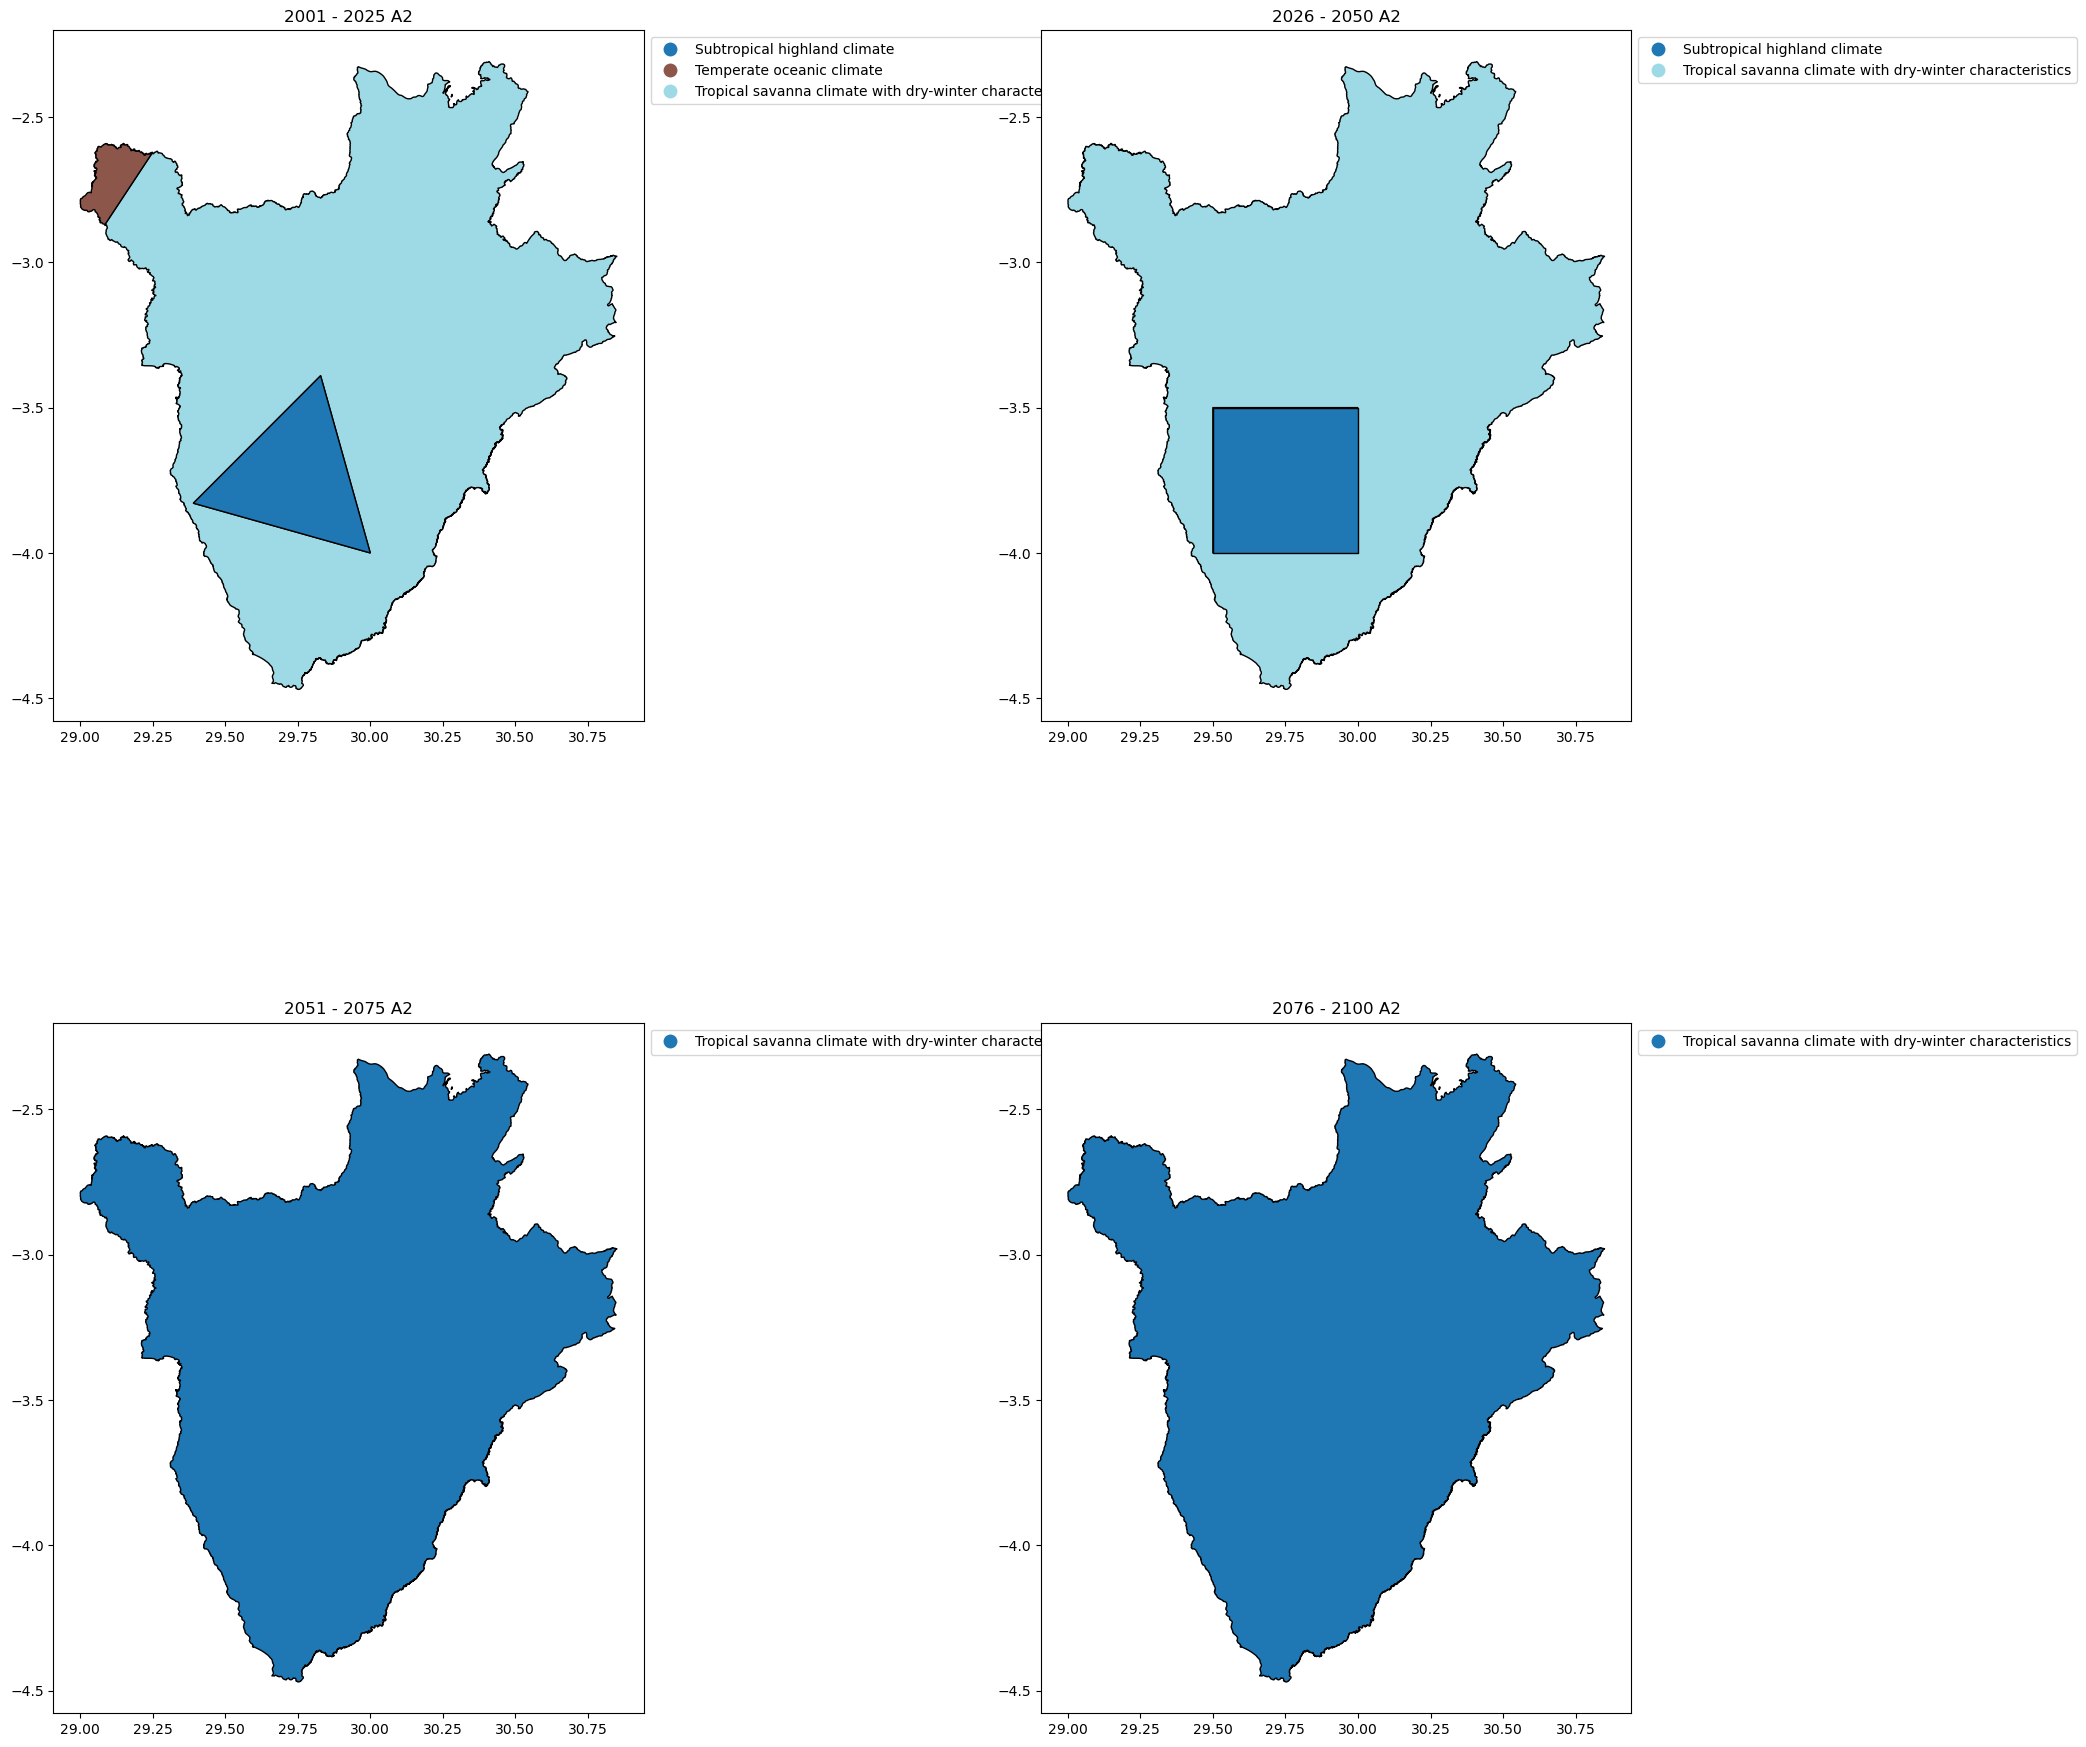

In [176]:
# Create a subplot with two panels on one row
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Plot for 2001-2025 in panel 1
ctry_climshifts_A225.plot(ax=ax1, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax1.set_title("2001 - 2025 A2")

# Plot for 2026-2050 in panel 2
ctry_climshifts_A250.plot(ax=ax2, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("2026 - 2050 A2")

# Plot for 2051-2075 in panel 3
ctry_climshifts_A275.plot(ax=ax3, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax3.set_title("2051 - 2075 A2")

# Plot for 2076-2100 in panel 4
ctry_climshifts_A2100.plot(ax=ax4, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax4.set_title("2076 - 2100 A2")

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


**Observation**

In the A2 climate scenario, projections indicate that Burundi would have three distinct climates existing between 2001 and 2025. The Tropical Savanna climate with dry-summer characteristics is expected to be the most dominant, followed by the Subtropical Highland climate and the temperate oceanic climate. However, by 2026, the temperate oceanic climate is projected to become obsolete, leaving only the other two climates.

Looking further into the future, from 2051 to 2100, the scenario suggests a significant shift in Burundi's climate profile. It predicts that the Tropical Savanna climate with dry-summer characteristics will be the sole existing climate in the country during this period.

    B1 CLIMATE SCENARIO

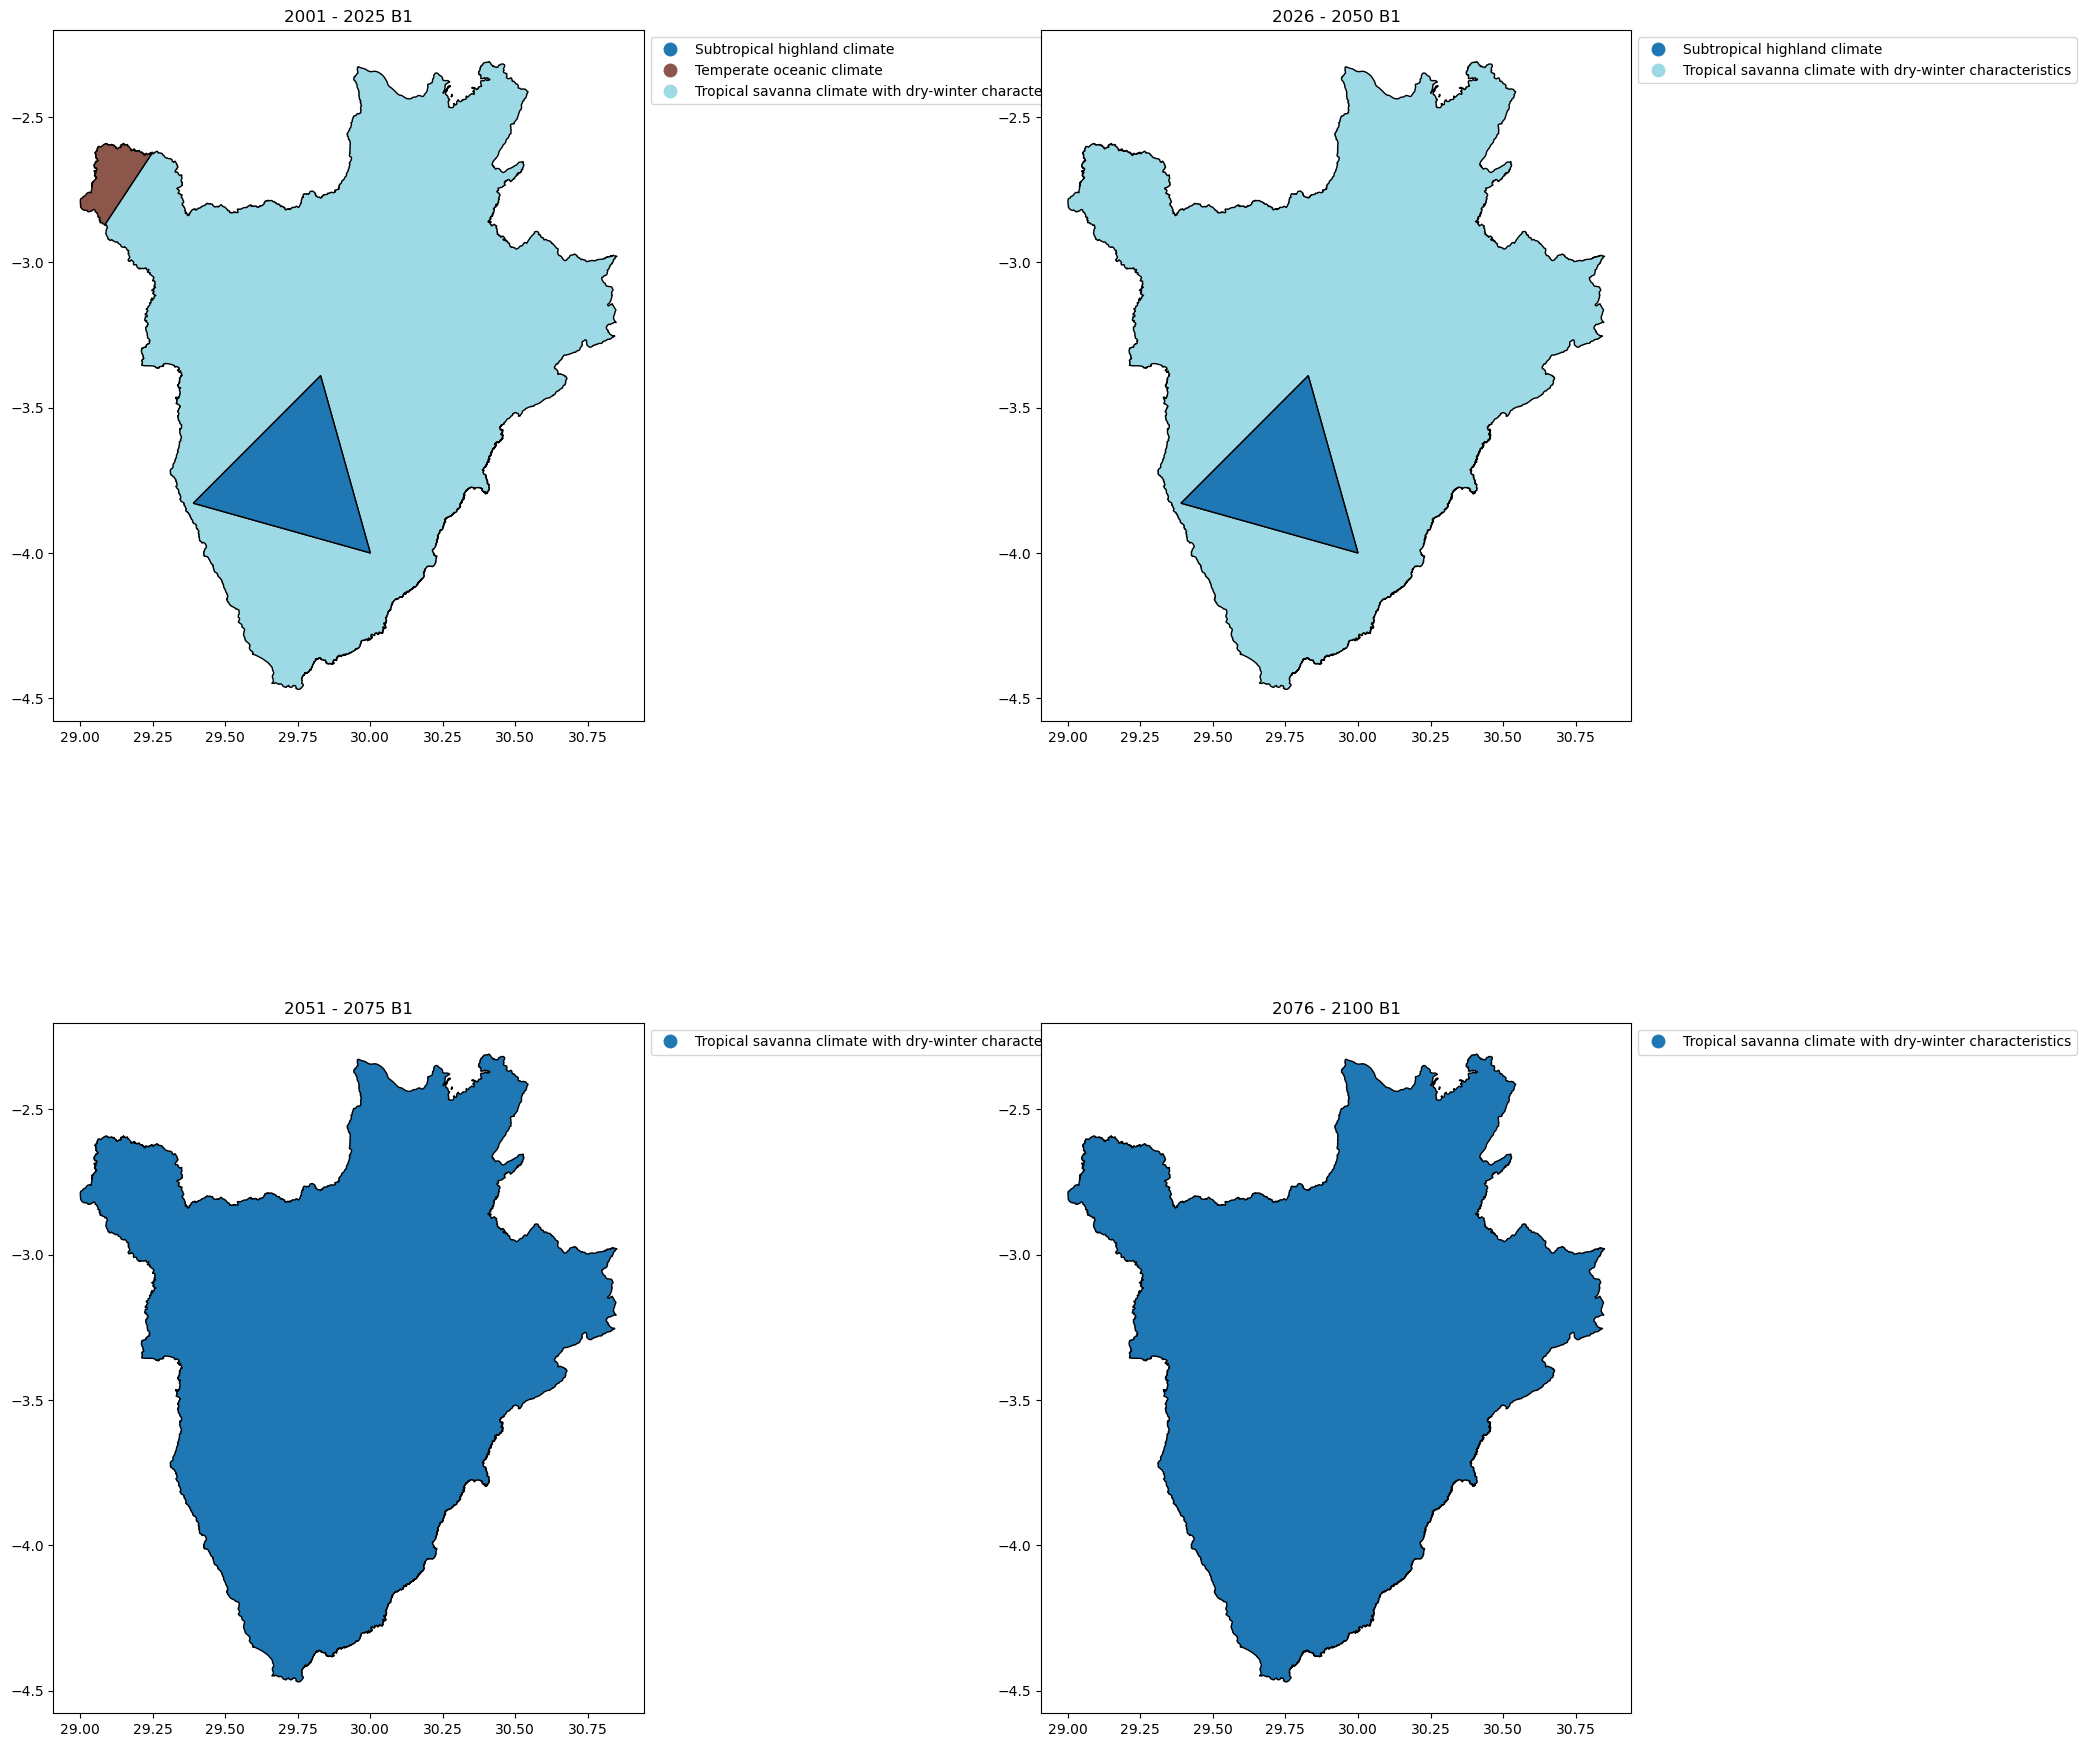

In [177]:
# Create a subplot with two panels on one row
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Plot for 2001-2025 in panel 1
ctry_climshifts_B125.plot(ax=ax1, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax1.set_title("2001 - 2025 B1")

# Plot for 2026-2050 in panel 2
ctry_climshifts_B150.plot(ax=ax2, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("2026 - 2050 B1")

# Plot for 2051-2075 in panel 3
ctry_climshifts_B175.plot(ax=ax3, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax3.set_title("2051 - 2075 B1")

# Plot for 2076-2100 in panel 4
ctry_climshifts_B1100.plot(ax=ax4, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax4.set_title("2076 - 2100 B1")

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


**Observation**

The B1 climate scenario presents projections that echo previous trends seen in the A1F1 climate scenario.

    B2 CLIMATE SCENARIO

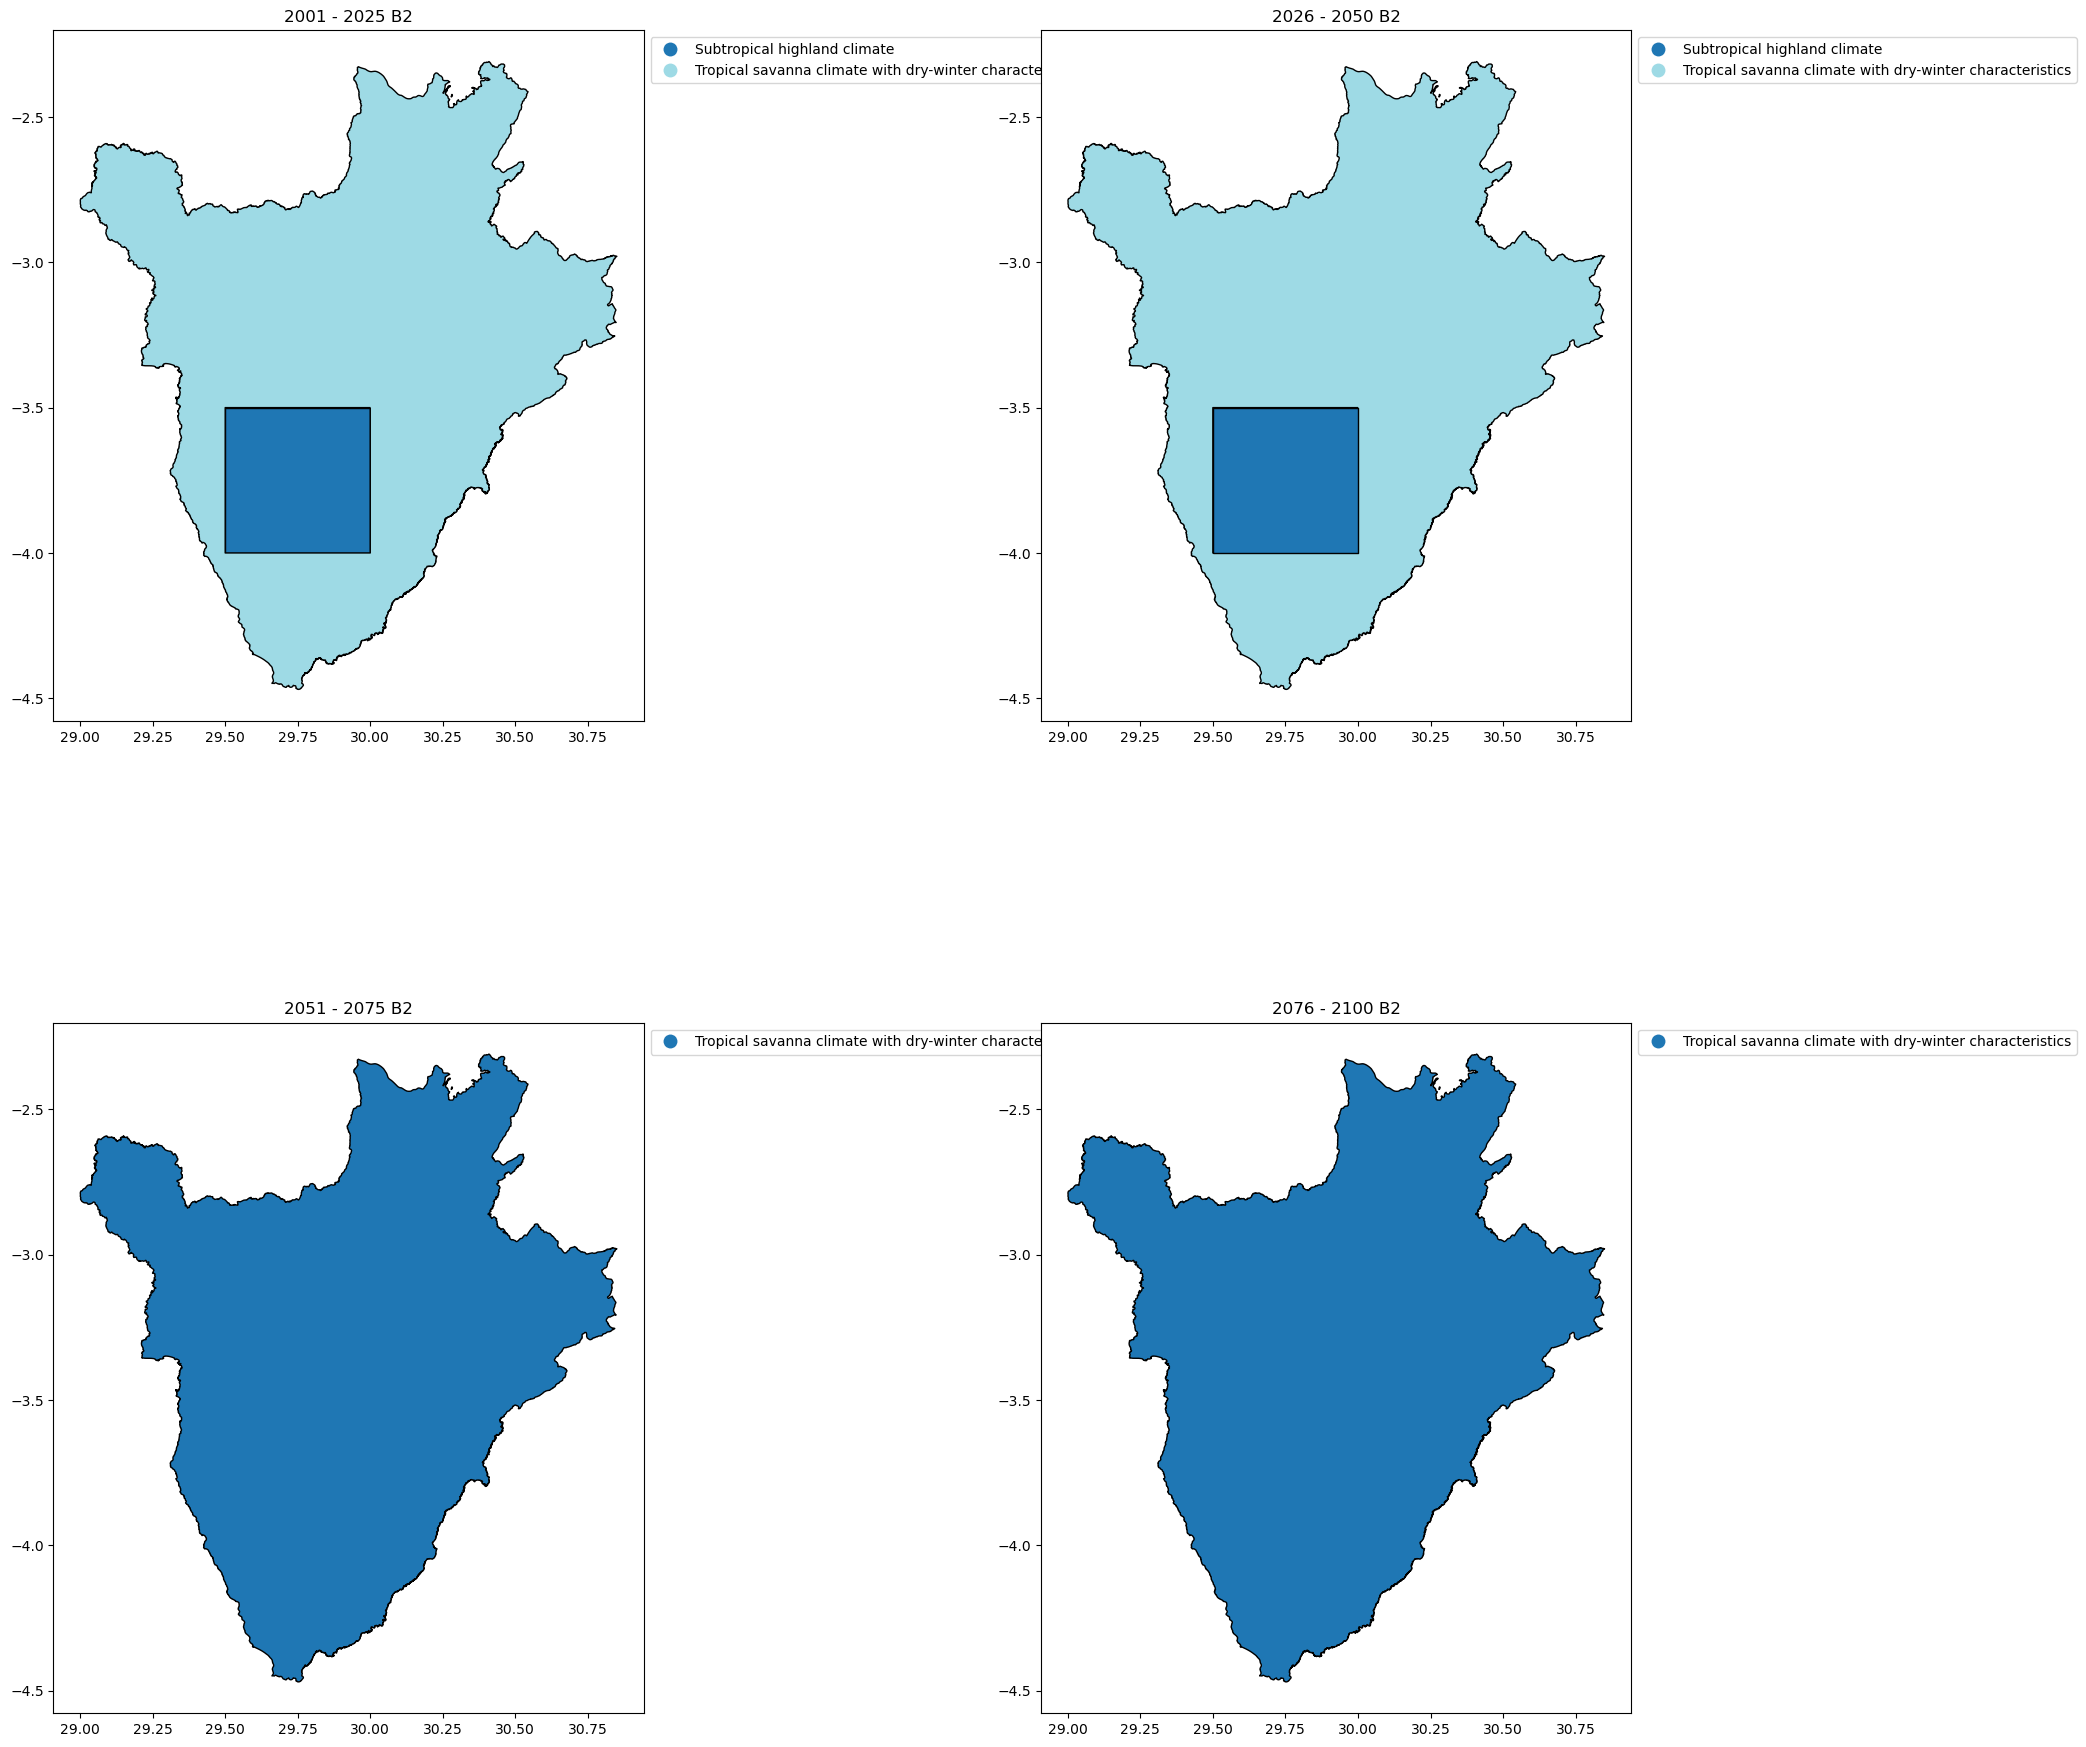

In [178]:
# Create a subplot with two panels on one row
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Plot for 2001-2025 in panel 1
ctry_climshifts_B225.plot(ax=ax1, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax1.set_title("2001 - 2025 B2")

# Plot for 2026-2050 in panel 2
ctry_climshifts_B250.plot(ax=ax2, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("2026 - 2050 B2")

# Plot for 2051-2075 in panel 3
ctry_climshifts_B275.plot(ax=ax3, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax3.set_title("2051 - 2075 B2")

# Plot for 2076-2100 in panel 4
ctry_climshifts_B2100.plot(ax=ax4, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax4.set_title("2076 - 2100 B2")

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


**Observation**

In the B2 climate scenario, it is projected that the Tropical Savanna climate with dry-summer characteristics and the Subtropical highland climate will be the existing climates, with the Tropical Savanna climate with dry-summer characteristics being the most dominant. By 2051, the Tropical Savanna climate with dry-summer characteristics is expected to be the sole existing climate.

    6.2 CLIMATE OVERVIEW

Burundi's climatic profile, highlights its five main climate zones and emphasizes the prevalence of the Tropical Montane climate zone. This zone's significance in both frequency and geographical coverage underscores its impact on Burundi's ecological landscape and agricultural practices.

Historical trends reveal the dominance of the Tropical Savanna climate with dry-summer characteristics and the Subtropical Highland climate between 1901 and 2000. While the former remained predominant, the latter experienced a reduction in coverage around 1957, suggesting potential shifts in environmental factors.

Projections under the A1F1 scenario raise concerns about future climate change, indicating a shift towards the sole existence of the Tropical Savanna climate with dry-summer characteristics by 2100. Similarly, the A2 scenario foresees changes in climate distribution, with the Tropical Savanna climate dominating over the temperate oceanic climate.

In the B1 scenario, projections align with those of the A1F1 scenario, while the B2 scenario indicates the coexistence of the Tropical Savanna climate and the Subtropical Highland climate, with the former becoming the sole climate by 2051.

These findings emphasize the urgent need for proactive measures to address climate change impacts and promote sustainable development practices in Burundi. Understanding historical trends and future projections is crucial for informed decision-making and effective climate adaptation strategies in the region.

#### 7. SUMMARY AND RECOMMENDATION

Burundi, covering an area of approximately 25 billion square meters, boasts a diverse range of ecological landscapes and environmental features. Within its territory, Burundi encompasses 18 provinces, with Ruyigi province being the largest in terms of size. The country is home to various ecological zones, including the Eastern Afromontane biodiversity hotspot, renowned for its unique ecosystems and endemic species. Additionally, Burundi exhibits five main climate zones, with the Tropical Montane climate zone being the most prevalent and geographically widespread. In terms of soil diversity, Burundi's ecosystems are significantly influenced by three distinct soil types: Acrisol, Ferralsol, and Nitisol, each playing a vital role in the country's ecological balance and agricultural productivity. Moreover, Burundi boasts a total of 14 protected areas across four distinct categories, with Parc National being the most prevalent, totaling 25 occurrences nationwide. These protected areas serve as vital habitats for biodiversity conservation and contribute to the country's rich natural heritage.

Burundi, with its diverse ecological landscapes and unique environmental features, faces various challenges and opportunities in managing its natural resources effectively. Here's a closer look at key observations and actionable recommendations:

ACTIONABLE INSIGHTS AND RECOMMENDATION

1. Infrastructure and Road Network: Given the prevalence of unspecified roads and the scarcity of trail roads, there is a need for further clarification and documentation of road designations. Conducting a comprehensive assessment of road infrastructure and designations will enhance data quality and facilitate effective land sector analysis and decision-making.

2. Biodiversity Conservation: Given the significance of the Eastern Afromontane biodiversity hotspot, conservation efforts should prioritize protecting and preserving this unique ecological treasure. Collaborative initiatives involving government agencies, conservation organizations, and local communities can help establish protected areas, implement conservation measures, and mitigate threats to biodiversity.

3. Agroecological Management: With the dominance of the Boreal-Arid agroecological zone, agricultural practices and land use planning should be tailored to the environmental conditions of this zone. Implementing sustainable farming techniques, crop diversification, and soil conservation practices can enhance agricultural productivity while minimizing environmental degradation.

4. Ecological Diversity and Holdridge Life Zones: Addressing data discrepancies related to Holdridge life zones is essential for accurate ecological analysis and biodiversity conservation efforts. Conducting comprehensive surveys and studies to identify and name all Holdridge life zones will contribute to a better understanding of Burundi's ecological diversity and facilitate effective conservation strategies.

5. Water Resource Management: Integrating water bodies into soil resource management strategies can enhance sustainable land management practices and support environmental conservation efforts. Implementing measures to protect and preserve water bodies will ensure the provision of essential aquatic ecosystem services and promote ecosystem resilience.

6. Climate Change Adaptation: Given the projected changes in climate distribution under different scenarios, proactive measures should be taken to address climate change impacts and promote resilience. Developing climate adaptation strategies, investing in climate-resilient infrastructure, and promoting sustainable land use practices can help mitigate the adverse effects of climate change and foster long-term sustainability.

7. Capacity Building and Collaboration: Building institutional capacity, promoting stakeholder engagement, and fostering collaboration among government agencies, research institutions, and civil society organizations are crucial for effective environmental management and sustainable development in Burundi. Supporting education and awareness programs on environmental conservation and climate change adaptation will empower communities to actively participate in conservation efforts and contribute to positive environmental outcomes.
Burundi, with its diverse ecological landscapes and unique environmental features, faces various challenges and opportunities in managing its natural resources effectively. Here's a closer look at key observations and actionable recommendations:

Incorporating these actionable insights and recommendations into policy frameworks, development plans, and conservation strategies will contribute to promoting sustainable development, preserving biodiversity, and enhancing environmental resilience in Burundi.

#### 8. REFERENCES

[World Soil Resources- FAO](https://www.fao.org/3/i5199e/i5199e.pdf)

[Global Roads Documentation](https://sedac.ciesin.columbia.edu/downloads/docs/groads/groads-v1-documentation.pdf)

[World Climate Zones](https://www.researchgate.net/publication/314211373_World_Climate_Zones#full-text)

[Climate Changes](https://sos.noaa.gov/catalog/datasets/koppen-geiger-climate-changes-1901-2100/)

[EPSG Information](https://docs.up42.com/data/reference/utm#:~:text=For%20the%20Southern%20Hemisphere,indicating%20the%20respective%20UTM%20zone)

[Burundi](https://en.wikipedia.org/wiki/Burundi)